# **Team Project: Predicting Annual Salary for Data Science and STEM Roles**

### **Karollyne Zortea**

## **Introduction**
Our project aims to provide data science and data analytics professionals with valuable insights into the expected salary range for a specific position. By analyzing various factors such as location, position and education, our project aims to provide a clear view of the salary that professionals can expect to earn. Additionally, our dataset includes information on cost of living indices, which can provide a more comprehensive understanding of the financial benefits of a job offer in a particular location. Our project can serve as a valuable tool for professionals looking to negotiate salaries and make informed career decisions.

**Objective:** To predict the annual salary (including base pay, stock grants and estimated bonuses) for data science and STEM roles using data from LEVELS.FYI and NUMBEO.

---
---

## **Data Sources**


**Levels.FYI:** For salary and education data ranging from 2017 to 2021.

*   Data scrapped from: https://www.levels.fyi/.


---


**The data:**


**timestamp:** Date and time when the details was submitted

**company:** Hiring company

**level:** Job grade

**title:** Job title

**totalyearlycompensation:** Annual salary including base salary, value of granted stock and bonus

**location_city:** Job location city

**location_state:** Job location state

**location_country:** Job location country

**yearsofexperience:** Total number years of experience

**yearsatcompany:** Total number years of experience at a certain company

**tag:** N/A

**basesalary:** Basic salary

**stockgrantvalue:** Value of granted stock

**bonus:** Total bonus

**gender:** Gender/sex of the hiree

**otherdetails:** Other details submitted

**cityid:** ID of the city where the job was located

**Masters_Degree:** If hiree has a Master's Degree

**Bachelors_Degree:** If hiree has a Bachelor's Degree

**Doctorate_Degree:** If hiree has a Doctorate's Degree

**Highschool:** If hiree has a High School Degree

**Some_College:** If hiree has (any) College Degree

**Race_Asian:** If hiree's race is Asian

**Race_White:** If hiree's race is White

**Race_Two_Or_More:** If hiree's race is two or more

**Race_Black:** If hiree's race is Black

**Race_Hispanic:** If hiree's race is Hispanic

**Race:** Race information of hiree

**Education:** Education information of hiree

---

**Numbeo:** For living cost metrics.

*   Data for cost of living indexes by country scrapped from: https://www.numbeo.com/cost-of-living/.
*   Data for cost of living indexes by city (Northern America) scrapped from: https://www.numbeo.com/cost-of-living/region_rankings.jsp?title=2020&region=021

---

**The data:**

**Cost of Living Index:** Indicator of consumer goods prices, including groceries, restaurants, transportation and utilities. Cost of Living Index does not include rent or mortage costs. If a city has a Cost of Living Index of 120, Numbeo estimates it is 20% more expensive than New York.

**Rent Index:** Estimation of prices of renting apartments in the city. If Rent index is 80, Numbeo estimates that price of rents in that city is on average 20% less than the price in New York.

**Groceries Index:** Estimation of grocery prices in the city compared to New York City.

**Restaurants Index:** Comparison of prices of meals and drinks in restaurants and bars compared to New York City.

**Cost of Living Plus Rent Index:** Estimation of consumer goods prices including rent.

**Local Purchasing Power:**  It shows purchasing power in buying goods and services in a given city for the average net salary in that city. If domestic purchasing power is 40, this means that the inhabitants of that city with an average salary can afford to buy on an average 60% less goods and services than New York City residents with an average salary.

---

#### **Mounting the drive:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **Importing the necessary libraries:**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from pandas.api.types import CategoricalDtype
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import math
from sklearn.impute import SimpleImputer
from sklearn import neighbors
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')

#### **Uploading the csv file:**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth

salary_data = pd.read_csv('https://raw.githubusercontent.com/kzortea/Machine_learning/main/Levels_Fyi_salarydata_main.csv')


# **Data Understanding**

---

#### **Displaying the first few rows:**

In [ ]:
salary_data.head()

timestamp    company   level              title  \
0   8/16/19 8:42     Amazon      L5  Software Engineer   
1    2/8/20 8:44     Amazon  SDE II  Software Engineer   
2   5/17/21 9:12     Amazon      L4  Software Engineer   
3  5/17/19 16:49  Atlassian      P5  Software Engineer   
4   5/26/19 2:15  Microsoft      63  Software Engineer   

   totalyearlycompensation location_city location_state location_country  \
0                   112000        Aachen             NW          Germany   
1                   109000        Aachen             NW          Germany   
2                   114000        Aachen             NW          Germany   
3                   145000      Canberra             CT        Australia   
4                   191000      Canberra             CT        Australia   

                                   concatenated_main  yearsofexperience  ...  \
0       AmazonL5Software Engineer087000200023000Male                5.0  ...   
1  AmazonSDE IISoftware Engineer1850001000010000Male                3.0  ...   
2       AmazonL4Software Engineer097000120004000Male                4.0  ...   
3   AtlassianP5Software Engineer6130000100005000Male                6.0  ...   
4             Microsoft63Software Engineer2000Female               10.0  ...   

   Race_Black Race_Hispanic   Race        Education  Cost of Living Index  \
0           0             0    NaN              NaN                 66.44   
1           0             0    NaN              NaN                 66.44   
2           0             0  Asian  Master's Degree                 66.44   
3           0             0    NaN              NaN                 70.44   
4           0             0    NaN              NaN                 70.44   

  Rent Index Cost of Living Plus Rent Index  Groceries Index  \
0      32.87                          50.46            48.90   
1      32.87                          50.46            48.90   
2      32.87                          50.46            48.90   
3      49.09                          60.28            66.86   
4      49.09                          60.28            66.86   

   Restaurant Price Index  Local Purchasing Power Index  
0                   62.94                        129.38  
1                   62.94                        129.38  
2                   62.94                        129.38  
3                   76.10                        149.75  
4                   76.10                        149.75  

[5 rows x 36 columns]

#### **Getting statistical information on the data:**

In [ ]:
salary_data.describe(include='all', datetime_is_numeric=False)

timestamp company  level              title  \
count            62642   62637  62523              62642   
unique           60523    1631   2916                 15   
top     10/31/18 19:57  Amazon     L4  Software Engineer   
freq                 4    8126   5014              41231   
mean               NaN     NaN    NaN                NaN   
std                NaN     NaN    NaN                NaN   
min                NaN     NaN    NaN                NaN   
25%                NaN     NaN    NaN                NaN   
50%                NaN     NaN    NaN                NaN   
75%                NaN     NaN    NaN                NaN   
max                NaN     NaN    NaN                NaN   

        totalyearlycompensation location_city location_state location_country  \
count              6.264200e+04         62642          62642            62642   
unique                      NaN           955            200               82   
top                         NaN       Seattle             CA    United States   
freq                        NaN          8701          22824            52820   
mean               2.163004e+05           NaN            NaN              NaN   
std                1.380337e+05           NaN            NaN              NaN   
min                1.000000e+04           NaN            NaN              NaN   
25%                1.350000e+05           NaN            NaN              NaN   
50%                1.880000e+05           NaN            NaN              NaN   
75%                2.640000e+05           NaN            NaN              NaN   
max                4.980000e+06           NaN            NaN              NaN   

                                       concatenated_main  yearsofexperience  \
count                                              62642       62462.000000   
unique                                             60715                NaN   
top     FacebookE4Software Engineer01600007500016000Male                NaN   
freq                                                  22                NaN   
mean                                                 NaN           7.215258   
std                                                  NaN           5.846217   
min                                                  NaN           0.000000   
25%                                                  NaN           3.000000   
50%                                                  NaN           6.000000   
75%                                                  NaN          10.000000   
max                                                  NaN          69.000000   

        ...    Race_Black Race_Hispanic   Race        Education  \
count   ...  62642.000000  62642.000000  22427            30370   
unique  ...           NaN           NaN      5                5   
top     ...           NaN           NaN  Asian  Master's Degree   
freq    ...           NaN           NaN  11772            15391   
mean    ...      0.011015      0.018039    NaN              NaN   
std     ...      0.104373      0.133094    NaN              NaN   
min     ...      0.000000      0.000000    NaN              NaN   
25%     ...      0.000000      0.000000    NaN              NaN   
50%     ...      0.000000      0.000000    NaN              NaN   
75%     ...      0.000000      0.000000    NaN              NaN   
max     ...      1.000000      1.000000    NaN              NaN   

        Cost of Living Index    Rent Index Cost of Living Plus Rent Index  \
count           60391.000000  60391.000000                   60391.000000   
unique                   NaN           NaN                            NaN   
top                      NaN           NaN                            NaN   
freq                     NaN           NaN                            NaN   
mean              100.375659     70.501069                      86.157331   
std                51.793883     66.645658                      53.957195   
min                21.2100

#### **Upon briefly examining, we can imply that:**

*  Much of the data can be attributed to job roles within Amazon.
*  The majority of submissions pertain to level L4 positions, specifically for the role of Software Engineer. Upon verifying on the internet, Level 4 at Amazon is typically referred to as "Senior Manager" or "Senior Product Manager" roles.
*  For **totalyearlycompensation**, mean and median are quite far away, hence the distribution might be skewed - similarly for **basesalary, stockgrantvalue** and **bonus**.
*  Most of the data submissions are for job roles located in **Seattle, WA**.
*  On average, employees stay at the company for 2.7 years, with a median of approximately 1 year. This suggests that job hopping is prevalent in tech roles, as individuals often remain with a company for only a single year.
*  A significant portion of the data represents males, indicating a gender imbalance within the tech sector.
*  The average years of experience is approximately 7 years, while the median stands at 6 years.

#### **Understanding what the dataset contains:**

In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   timestamp                       62642 non-null  object 
 1   company                         62637 non-null  object 
 2   level                           62523 non-null  object 
 3   title                           62642 non-null  object 
 4   totalyearlycompensation         62642 non-null  int64  
 5   location_city                   62642 non-null  object 
 6   location_state                  62642 non-null  object 
 7   location_country                62642 non-null  object 
 8   concatenated_main               62642 non-null  object 
 9   yearsofexperience               62462 non-null  float64
 10  yearsatcompany                  62642 non-null  float64
 11  tag                             61788 non-null  object 
 12  basesalary                      

#### **Checking for null values:**

In [ ]:
salary_data.isnull().sum()

timestamp                             0
company                               5
level                               119
title                                 0
totalyearlycompensation               0
location_city                         0
location_state                        0
location_country                      0
concatenated_main                     0
yearsofexperience                   180
yearsatcompany                        0
tag                                 854
basesalary                            0
stockgrantvalue                       0
bonus                                 0
gender                            19540
otherdetails                      22505
cityid                                0
Masters_Degree                        0
Bachelors_Degree                      0
Doctorate_Degree                      0
Highschool                            0
Some_College                          0
Race_Asian                            0
Race_White                            0


# **Data Cleaning and Preparation**

---


#### **Creating salary bins for annual salaries:**

In [ ]:
BINS = [0,50000,70000,90000,120000,150000,180000,210000,240000,270000,300000,330000,360000,400000]
salary_data['Salary_Bins'] = pd.cut(x=salary_data['totalyearlycompensation'], bins=BINS, labels=False)

salary_data['Salary_Bins']

0        3.0
1        3.0
2        3.0
3        4.0
4        6.0
        ... 
62637    4.0
62638    4.0
62639    9.0
62640    5.0
62641    7.0
Name: Salary_Bins, Length: 62642, dtype: float64

#### **Converting all of company names to lowercase, as some names are not consistently capitalized:**

In [ ]:
salary_data['company'] = salary_data['company'].str.lower()

#### **Some companies names are inconsistent, replacing them with the correct name to avoid duplication:**

In [ ]:
fix1 = salary_data['company'] == 'jane street'
salary_data.loc[fix1, 'company'] = 'jane street capital'

fix2 = salary_data['company'] == 'akamai'
salary_data.loc[fix2, 'company'] = 'akamai technologies'

fix3 = salary_data['company'] == 'amazon.com'
salary_data.loc[fix3, 'company'] = 'amazon'

fix4 = salary_data['company'] == 'amzon'
salary_data.loc[fix4, 'company'] = 'amazon'

fix5 = salary_data['company'] == 'apple inc.'
salary_data.loc[fix5, 'company'] = 'apple'

fix6 = salary_data['company'] == 'arista'
salary_data.loc[fix6, 'company'] = 'arista networks'

fix7 = salary_data['company'] == 'aruba'
salary_data.loc[fix7, 'company'] = 'aruba networks'

fix8 = salary_data['company'] == 'aws'
salary_data.loc[fix8, 'company'] = 'amazon web services'

fix9 = salary_data['company'] == 'bain'
salary_data.loc[fix9, 'company'] = 'bain & company'

fix10 = salary_data['company'] == 'bank of america merrill lynch'
salary_data.loc[fix10, 'company'] = 'bank of america'

fix11 = salary_data['company'] == 'bosch global'
salary_data.loc[fix11, 'company'] = 'bosch'

fix12 = salary_data['company'] == 'caci'
salary_data.loc[fix12, 'company'] = 'caci international'

fix13 = salary_data['company'] == 'cgi'
salary_data.loc[fix13, 'company'] = 'cgi group'

fix14 = salary_data['company'] == 'citi'
salary_data.loc[fix14, 'company'] = 'citi bank'

fix15 = salary_data['company'] == 'cognizant technology solutions'
salary_data.loc[fix15, 'company'] = 'cognizant'

fix16 = salary_data['company'] == 'coupa'
salary_data.loc[fix16, 'company'] = 'coupa software'

fix16 = salary_data['company'] == 'dell'
salary_data.loc[fix16, 'company'] = 'dell technologies'

fix17 = salary_data['company'] == 'deloitte consulting LLP'
salary_data.loc[fix17, 'company'] = 'deloitte consulting'

fix18 = salary_data['company'] == 'discover financial services'
salary_data.loc[fix18, 'company'] = 'discover'

fix19 = salary_data['company'] == 'dish'
salary_data.loc[fix19, 'company'] = 'dish network'

fix20 = salary_data['company'] == 'epam'
salary_data.loc[fix20, 'company'] = 'epam systems'

fix21 = salary_data['company'] == 'expedia group'
salary_data.loc[fix21, 'company'] = 'expedia'

fix22 = salary_data['company'] == 'ford motor'
salary_data.loc[fix22, 'company'] = 'ford motor company'

fix23 = salary_data['company'] == 'google llc'
salary_data.loc[fix23, 'company'] = 'google'

fix24 = salary_data['company'] == 'guidewire'
salary_data.loc[fix24, 'company'] = 'guidewire software'

fix25 = salary_data['company'] == 'hp inc'
salary_data.loc[fix25, 'company'] = 'hp'

fix26 = salary_data['company'] == 'intel corporation'
salary_data.loc[fix26, 'company'] = 'intel'

fix27 = salary_data['company'] == 'johnson and johnson'
salary_data.loc[fix27, 'company'] = 'johnson & johnson'

fix28 = salary_data['company'] == 'johnson'
salary_data.loc[fix28, 'company'] = 'johnson & johnson'

fix29 = salary_data['company'] == 'jpmorgan chase'
salary_data.loc[fix29, 'company'] = 'jp morgan'

fix30 = salary_data['company'] == 'jpmorgan'
salary_data.loc[fix30, 'company'] = 'jp morgan'

fix31 = salary_data['company'] == 'jp morgan chase'
salary_data.loc[fix31, 'company'] = 'jp morgan'

fix32 = salary_data['company'] == 'juniper'
salary_data.loc[fix32, 'company'] = 'juniper networks'

fix33 = salary_data['company'] == 'l3 harries'
salary_data.loc[fix33, 'company'] = 'l3 harries technologies'

fix34 = salary_data['company'] == 'liberty mutual insurance'
salary_data.loc[fix34, 'company'] = 'liberty mutual'

fix35 = salary_data['company'] == 'lowe\'s'
salary_data.loc[fix35, 'company'] = 'lowes'

fix36 = salary_data['company'] == 'macy\'s,'
salary_data.loc[fix36, 'company'] = 'macys'

fix37 = salary_data['company'] == 'macy\'s'
salary_data.loc[fix37, 'company'] = 'macys'

fix38 = salary_data['company'] == 'mckinsey & company'
salary_data.loc[fix38, 'company'] = 'mckinsey'

fix39 = salary_data['company'] == 'micron'
salary_data.loc[fix39, 'company'] = 'micron technology'

fix40 = salary_data['company'] == 'microchip'
salary_data.loc[fix40, 'company'] = 'microchip technology'

fix41 = salary_data['company'] == 'microsoft coorporation'
salary_data.loc[fix41, 'company'] = 'microsoft'

fix42 = salary_data['company'] == 'motorola solutions'
salary_data.loc[fix42, 'company'] = 'motorola'

fix43 = salary_data['company'] == 'nuance'
salary_data.loc[fix43, 'company'] = 'nuance communications'

fix44 = salary_data['company'] == 'oscar'
salary_data.loc[fix44, 'company'] = 'oscar health'

fix45 = salary_data['company'] == 'procore'
salary_data.loc[fix45, 'company'] = 'procore technologies'

fix46 = salary_data['company'] == 'qualcomm inc'
salary_data.loc[fix46, 'company'] = 'qualcomm'

fix47 = salary_data['company'] == 'raytheon'
salary_data.loc[fix47, 'company'] = 'raytheon technologies'

fix48 = salary_data['company'] == 'samsung electronics america'
salary_data.loc[fix48, 'company'] = 'samsung'

fix49 = salary_data['company'] == 'sap'
salary_data.loc[fix49, 'company'] = 'sap concur'

fix50 = salary_data['company'] == 'sas'
salary_data.loc[fix50, 'company'] = 'sas institute'

fix51 = salary_data['company'] == 'sony interactive entertainment'
salary_data.loc[fix51, 'company'] = 'sony'

fix52 = salary_data['company'] == 'zillow group'
salary_data.loc[fix52, 'company'] = 'zillow'

fix53 = salary_data['company'] == 'zs'
salary_data.loc[fix53, 'company'] = 'zs associates'

In [ ]:
companies = salary_data["company"].unique()

for company in companies:
    print(company)

amazon
atlassian
microsoft
ibm
accenture
chevron
andela
boeing
dxc technology
pwc
hpe
tata consultancy services
ca technologies
alarm.com
github
dell technologies
siemens
bosch
epam systems
yandex
viasat
philips
nuance communications
bytedance
uber
docusign
zendesk
datadog
doctolib
pluralsight
google
algolia
cisco
apple
capgemini
criteo
blackrock
twitter
wolters kluwer
adevinta
huawei
mongodb
expedia
automattic
societe generale
tripadvisor
stripe
western digital
factset
vmware
airbus
paypal
citi bank
zoho
freshworks
nortonlifelock
verizon
fidelity investments
cognizant
bnp paribas
publicis sapient
thoughtworks
bank of america
trimble
mathworks
bny mellon
commscope
oracle
autodesk
booking.com
ebay
nice
deloitte
booking
adyen
optiver
facebook
servicenow
messagebird
ing
adidas
godaddy
xendit
udemy
surveymonkey
juniper networks
ihs markit
shell
tomtom
salesforce
databricks
pegasystems
elsevier
zoom
netflix
dazn group
warnermedia
gitlab
nutanix
amdocs
revolut
motorola
luxoft
ubs
qualtrics
a

#### **Cleaning up the "gender" column:**

In [ ]:
salary_data["gender"].unique()

array(['Male', 'Female', nan, 'Other', 'Title: Senior Software Engineer'],
      dtype=object)

#### **There are 4 distinct values in gender column: Male, Female, Other and Title: Senior Software Engineer.**

**We will change "Title: Senior Software Engineer" to "Other":**

In [ ]:
salary_data['gender'] = salary_data['gender'].replace('Title: Senior Software Engineer', np.nan)
print(salary_data['gender'].unique())

['Male' 'Female' nan 'Other']


#### **Dropping unnecessary columns "tag", "otherdetails" and "concatenated_main" as data is too unstructured to be effectively cleaned ("concatenated_main" was created to join information in the csv. file):**

In [ ]:
salary_data = salary_data.drop(['tag', 'otherdetails', 'concatenated_main'], axis=1)

#### **Converting the "timestamp" column to datetime format, extracting date only and overwriting column:**

In [ ]:
salary_data['timestamp'] = pd.to_datetime(salary_data['timestamp'])
salary_data['timestamp'] = salary_data['timestamp'].dt.date

In [ ]:
salary_data['year']= salary_data['timestamp'].apply(lambda x: x.year)

#### **Dropping "timestamp" column as we have created a new column "year":**

In [ ]:
salary_data = salary_data.drop(['timestamp'], axis=1)

In [ ]:
salary_data.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location_city',
       'location_state', 'location_country', 'yearsofexperience',
       'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus', 'gender',
       'cityid', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education',
       'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
       'Groceries Index', 'Restaurant Price Index',
       'Local Purchasing Power Index', 'Salary_Bins', 'year'],
      dtype='object')

#### **Checking for duplicate values in the "title":**

In [ ]:
salary_data["title"].unique()

array(['Software Engineer', 'Data Scientist', 'Solution Architect',
       'Management Consultant', 'Hardware Engineer', 'Sales',
       'Technical Program Manager', 'Software Engineering Manager',
       'Product Manager', 'Product Designer', 'Marketing',
       'Human Resources', 'Mechanical Engineer', 'Recruiter',
       'Business Analyst'], dtype=object)

# **EDA (Exploratoty Data Analysis) on Country Level**
---

### **We will be using the median instead of the mean for salary data, since it is a more appropriate measure of central tendency for skewed distributions. By doing so we can obtain a more representative measure of the typical salary.**

#### **Getting information on salary range among countries:**

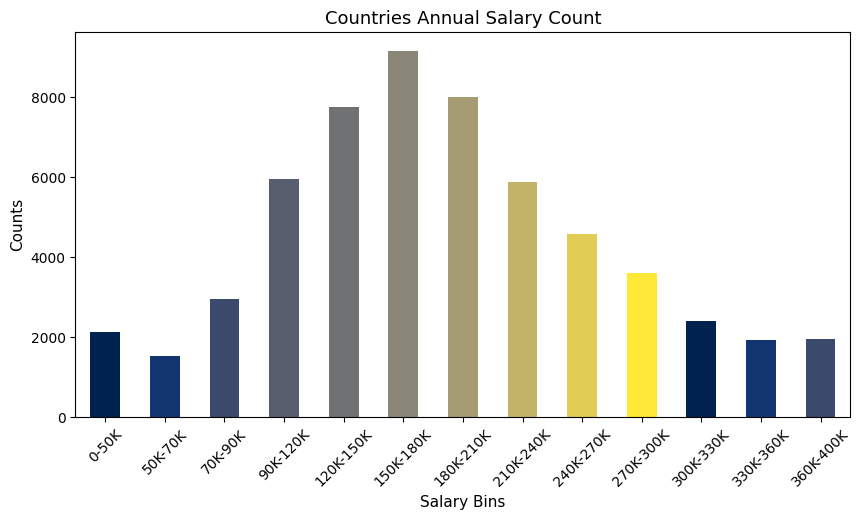

In [ ]:
colors_1 = ['#00224e', '#123570', '#3b496c', '#575d6d', '#707173', '#8a8678', '#a59c74', '#c3b369', '#e1cc55', '#fee838']

plt.figure(figsize=(10,5))
salary_data.groupby('Salary_Bins')['location_city'].count().plot.bar(color=colors_1)

plt.title("Countries Annual Salary Count", size=13)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],['0-50K','50K-70K','70K-90K','90K-120K','120K-150K','150K-180K','180K-210K','210K-240K', '240K-270K','270K-300K','300K-330K','330K-360K','360K-400K'], rotation=45)
plt.ylabel("Counts", size=11)
plt.xlabel("Salary Bins", size=11)

plt.show()

#### **Checking which countries tend to have highest salaries:**

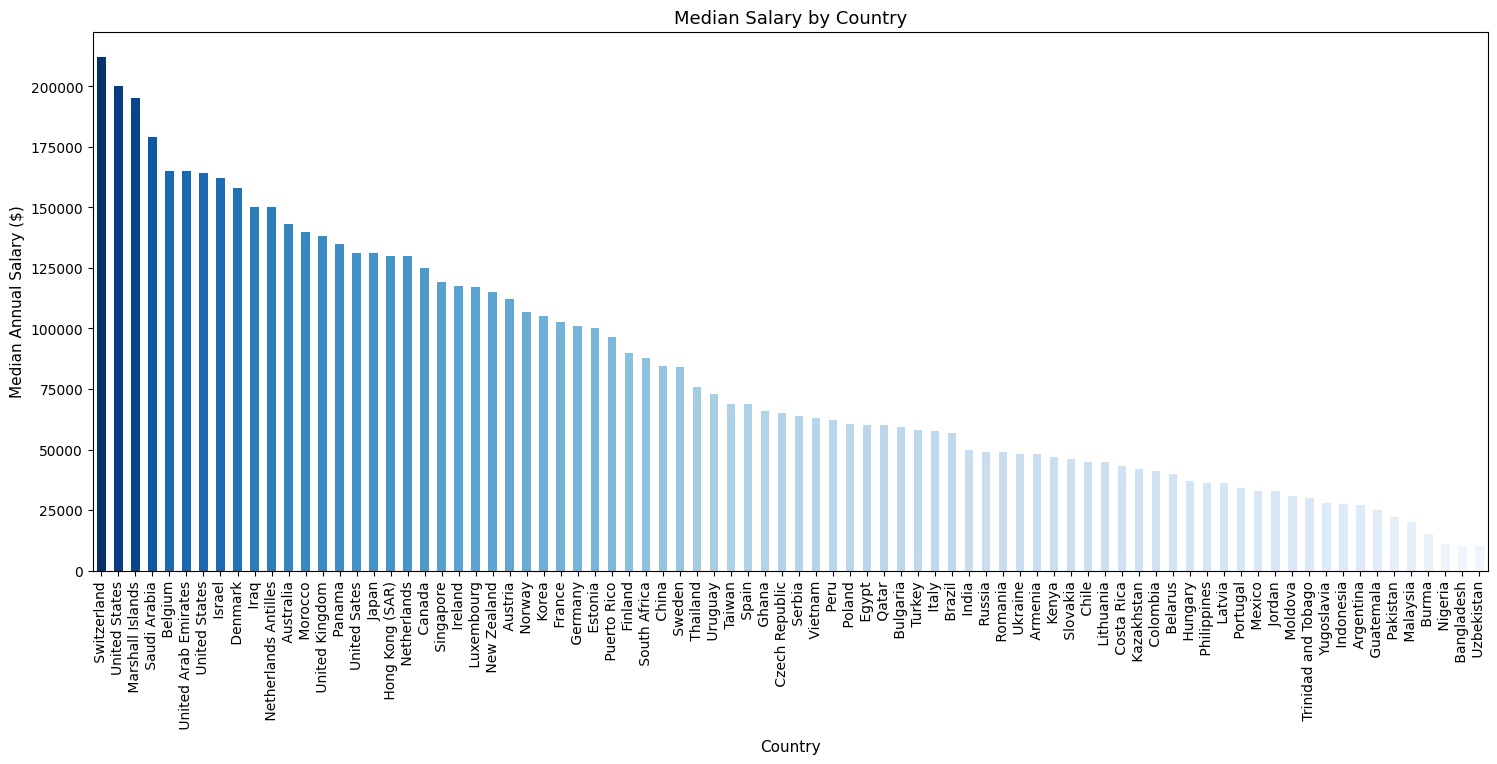

In [ ]:
plt.figure(figsize=(18,7))
country_salary = salary_data.groupby('location_country')['totalyearlycompensation'].median()
sorted_country_salary = country_salary.sort_values(ascending=False)
colors_2 = plt.cm.Blues(sorted_country_salary / float(max(sorted_country_salary)))
sorted_country_salary.plot.bar(color=colors_2)

plt.title("Median Salary by Country", size=13)
plt.ylabel("Median Annual Salary ($)", size=11)
plt.xlabel("Country", size=11)

plt.show()

#### **Top 3 countries with highest salaries are:**

1. Switzerland
2. **United States**
3. Marshall Islands

### **To narrow our project's scope, we will focus solely on data from the United States, where we are based.**

## **Data Cleaning and Preparation for United States Data**
---

#### **Fixing rows where United States is mispelled:**

In [ ]:
fix_countryUS = salary_data['location_country'] == 'United Sates'
salary_data.loc[fix_countryUS, 'location_country'] = 'United States'

#### **Creating a new dataset comprising solely of data from the United States:**

In [ ]:
us_salary_data = salary_data.loc[salary_data['location_country'] == 'United States']

In [ ]:
us_salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52838 entries, 648 to 62468
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   company                         52835 non-null  object 
 1   level                           52745 non-null  object 
 2   title                           52838 non-null  object 
 3   totalyearlycompensation         52838 non-null  int64  
 4   location_city                   52838 non-null  object 
 5   location_state                  52838 non-null  object 
 6   location_country                52838 non-null  object 
 7   yearsofexperience               52707 non-null  float64
 8   yearsatcompany                  52838 non-null  float64
 9   basesalary                      52838 non-null  int64  
 10  stockgrantvalue                 52838 non-null  float64
 11  bonus                           52838 non-null  float64
 12  gender                        

#### **Checking for null values in indexes columns:**

In [ ]:
us_salary_data[['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
                'Groceries Index','Restaurant Price Index', 'Local Purchasing Power Index']].isnull().sum()

Cost of Living Index              1179
Rent Index                        1179
Cost of Living Plus Rent Index    1179
Groceries Index                   1179
Restaurant Price Index            1179
Local Purchasing Power Index      1179
dtype: int64

#### **Handling the 1179 missing values from index's columns - using mean strategy instead of dropping them:**

In [ ]:
num_imputer = SimpleImputer(strategy='mean')
num_cols = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']
us_salary_data[num_cols] = num_imputer.fit_transform(us_salary_data[num_cols])

In [ ]:
us_salary_data[['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
                'Groceries Index','Restaurant Price Index', 'Local Purchasing Power Index']].isnull().sum()

Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

#### **Examining if the US dataset has zero compensation values:**


In [ ]:
us_zero_salary = us_salary_data.loc[:, ['year', 'company', 'level', 'totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus']][(us_salary_data['totalyearlycompensation'] == 0)]
print('{percent:.2f}% of the data with zero compensation'.format(percent=len(us_zero_salary)/len(us_salary_data)*100))

us_zero_salary.head()

0.00% of the data with zero compensation


Empty DataFrame
Columns: [year, company, level, totalyearlycompensation, basesalary, stockgrantvalue, bonus]
Index: []

#### The dataset shows that 0.00% of the data has zero compensation values, as indicated by the columns for year, company, level, total yearly compensation, base salary, stock grant value, and bonus.


In [ ]:
us_salary_data['totalyearlycompensation'].describe()

count    5.283800e+04
mean     2.353990e+05
std      1.376608e+05
min      1.100000e+04
25%      1.530000e+05
50%      2.000000e+05
75%      2.800000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

#### The median compensation is \$200,000 and the mean is \$235,399.

#### The maximum salary submission is at \$4.9 million and the minimum is at \$11,000.

5.077127017081383


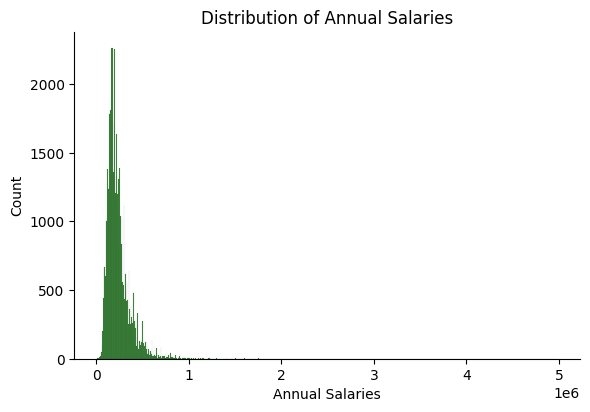

In [ ]:
print(us_salary_data['totalyearlycompensation'].skew())
plot = sns.displot(us_salary_data['totalyearlycompensation'], height=4, aspect=1.5, color='darkgreen')
plot.set(xlabel='Annual Salaries', title='Distribution of Annual Salaries')

#### Total Year Compensation is skewed to the left, meaning that annual salaries are clustered towards the higher end of the compensation range, with a few outliers towards the lower end.

#### **Checking for any outliers in "total year compensation":**


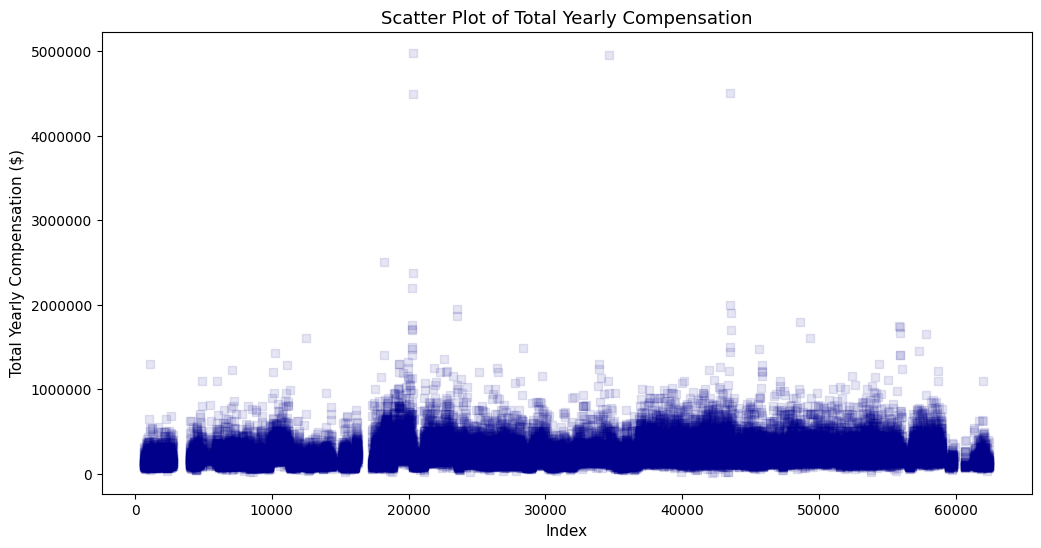

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.scatter(x=us_salary_data.index, y=us_salary_data['totalyearlycompensation'], marker='s', color='darkblue', alpha=0.1)

ax.set_xlabel('Index', fontsize=11)
ax.set_ylabel('Total Yearly Compensation ($)', fontsize=11)
ax.set_title('Scatter Plot of Total Yearly Compensation', fontsize=13)
ax.ticklabel_format(style='plain', axis='y', useLocale=True)

plt.show()


#### We can see from the graph that there are a few outliers in total year compensation (target variable).

#### We believe that salaries above \$2 million are outliers that are not representative of the typical salaries for STEM positions. By removing these extreme values, we can improve the accuracy of our salary predictions and make them more reliable for the majority of the data. We will go ahead and remove them:

In [ ]:
compensation_outliers = us_salary_data[us_salary_data["totalyearlycompensation"] > 2000000]
print(compensation_outliers)

         company level                         title  totalyearlycompensation  \
18206       snap    L8  Software Engineering Manager                  2500000   
20286   facebook    D1  Software Engineering Manager                  2200000   
20287   facebook    D1  Software Engineering Manager                  2372000   
20288   facebook    E9             Software Engineer                  4490000   
20289   facebook    E9               Product Manager                  4980000   
34659  microsoft    80  Software Engineering Manager                  4950000   
43537     google   L10               Product Manager                  4500000   

       location_city location_state location_country  yearsofexperience  \
18206    Los Angeles             CA    United States               20.0   
20286     Menlo Park             CA    United States               20.0   
20287     Menlo Park             CA    United States               22.0   
20288     Menlo Park             CA    United State

In [ ]:
us_salary_data = us_salary_data.drop(index=[18206, 20286, 20287, 20288, 20289, 34659, 43537])

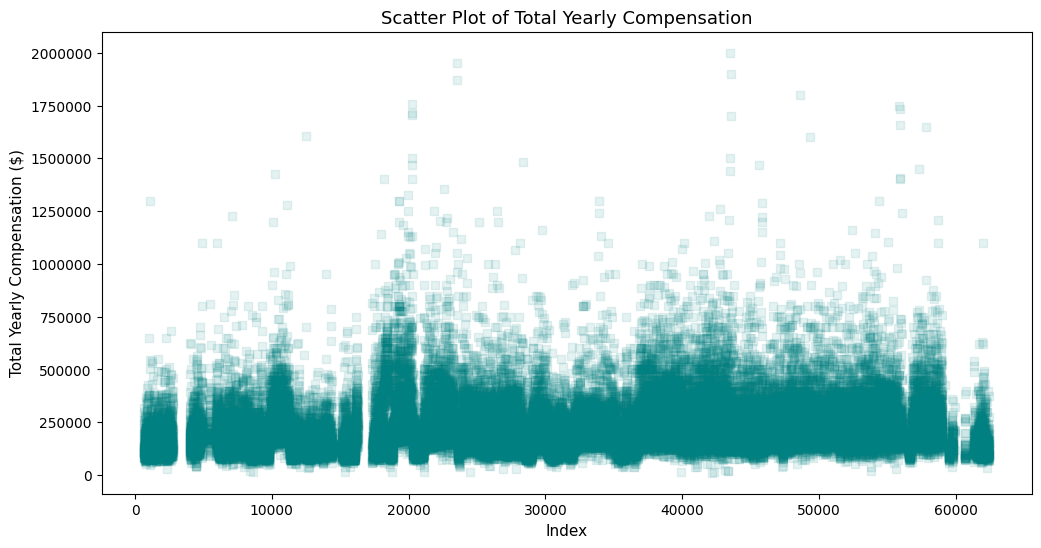

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x=us_salary_data.index, y=us_salary_data['totalyearlycompensation'], marker='s', color='teal', alpha=0.1)

ax.set_xlabel('Index', fontsize=11)
ax.set_ylabel('Total Yearly Compensation ($)', fontsize=11)
ax.set_title('Scatter Plot of Total Yearly Compensation', fontsize=13)
ax.ticklabel_format(style='plain', axis='y', useLocale=True)

plt.show()

#### **Examining for extreme low compensation values:**


In [ ]:
low_salary_threshold = 20000
low_salary = us_salary_data.loc[:, ['year', 'company', 'level', 'totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus']] \
    [(us_salary_data['totalyearlycompensation'] <= low_salary_threshold)]
print('{percent:.2f}% of the data with small compensation'.format(percent=len(low_salary)/len(us_salary_data)*100))
low_salary

0.02% of the data with small compensation


year                           company                     level  \
8654   2021                   bank of america                    Intern   
15327  2021                         accenture                        11   
18793  2019                             cvent                    Senior   
21102  2020                            yandex                       G13   
24505  2019                            andela                     Eng 3   
39947  2020                           verkada                        l3   
42179  2021                           delphix               entry level   
42312  2021                           zalando                        L3   
43351  2021  general dynamics mission systems                        L3   
43390  2021                            twilio  Software Engineer Intern   
53801  2021                         microsoft                    Intern   

       totalyearlycompensation  basesalary  stockgrantvalue    bonus  
8654                     15000       15000              0.0   3000.0  
15327                    16000       13000              0.0   3000.0  
18793                    15000      100000              0.0  15000.0  
21102                    15000       13000              0.0   2000.0  
24505                    16000       16000              0.0      0.0  
39947                    15000       14000              0.0      0.0  
42179                    11000       10000              0.0   1000.0  
42312                    15000       15000              0.0      0.0  
43351                    20000       20000              0.0      0.0  
43390                    20000       20000              0.0      0.0  
53801                    18000       18000              0.0      0.0

#### After conducting a thorough review and online research, we've discovered that some of the rows in our dataset contain inaccurate information, so we've decided to drop these rows from the dataset.

#### The rows (except for entry level and intern positions) will be dropped.

#### We'll be dropping the columns for "basesalary", "stockgrantvalue", and "bonus" from our analysis since they are components of the target variable "totalyearcompensation", which is the sum of these three variables. By doing so, we can avoid the risk of multicollinearity in our regression analysis (where two or more predictor variables are highly correlated with each other).

In [ ]:
us_salary_data = us_salary_data.drop(index=[15327, 18793, 21102, 24505, 39947, 42312, 43351])

In [ ]:
low_salary_threshold = 20000
low_salary = us_salary_data.loc[:, ['year', 'company', 'level', 'totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus']] \
    [(us_salary_data['totalyearlycompensation'] <= low_salary_threshold)]
print('{percent:.2f}% of the data with small compensation'.format(percent=len(low_salary)/len(us_salary_data)*100))
low_salary

0.01% of the data with small compensation


year          company                     level  \
8654   2021  bank of america                    Intern   
42179  2021          delphix               entry level   
43390  2021           twilio  Software Engineer Intern   
53801  2021        microsoft                    Intern   

       totalyearlycompensation  basesalary  stockgrantvalue   bonus  
8654                     15000       15000              0.0  3000.0  
42179                    11000       10000              0.0  1000.0  
43390                    20000       20000              0.0     0.0  
53801                    18000       18000              0.0     0.0

In [ ]:
us_salary_data = us_salary_data.drop(['basesalary', 'stockgrantvalue', 'bonus'], axis=1)

In [ ]:
us_salary_data.columns

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location_city',
       'location_state', 'location_country', 'yearsofexperience',
       'yearsatcompany', 'gender', 'cityid', 'Masters_Degree',
       'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College',
       'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black',
       'Race_Hispanic', 'Race', 'Education', 'Cost of Living Index',
       'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index', 'Salary_Bins',
       'year'],
      dtype='object')

In [ ]:
us_salary_data['totalyearlycompensation'].quantile([0.95, 0.99])

0.95    480000.0
0.99    710000.0
Name: totalyearlycompensation, dtype: float64

#### **Checking for any outliers in "total years of experience":**

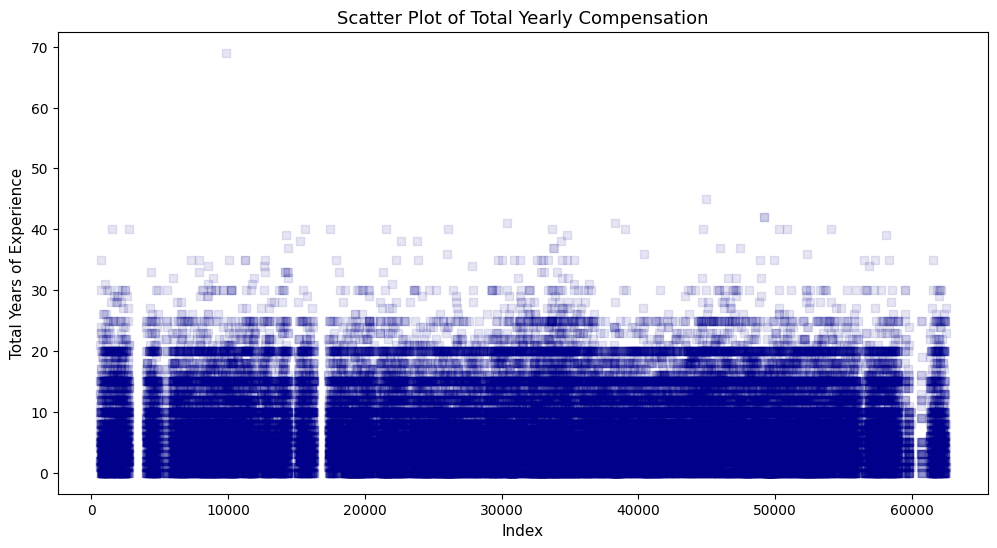

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x=us_salary_data.index, y=us_salary_data['yearsofexperience'], marker='s', color='darkblue', alpha=0.1)

ax.set_xlabel('Index', fontsize=11)
ax.set_ylabel('Total Years of Experience', fontsize=11)
ax.set_title('Scatter Plot of Total Yearly Compensation', fontsize=13)
ax.ticklabel_format(style='plain', axis='y', useLocale=True)

plt.show()

#### Based on the plot above, we can observe that the majority of the data points are clustered under ~44 years, with only a few outliers above this threshold.

#### We'll go ahead and remove all data points above 44 years to ensure that the data is more representative of the population of interest:

In [ ]:
experience_outliers = us_salary_data[us_salary_data["yearsofexperience"] > 44]
print(experience_outliers)

      company   level             title  totalyearlycompensation  \
9825   disney       5  Product Designer                   102000   
44970     ibm  Band 9  Business Analyst                   155000   

      location_city location_state location_country  yearsofexperience  \
9825          Crapo             MD    United States               69.0   
44970      San Jose             CA    United States               45.0   

       yearsatcompany  gender  ...   Race        Education  \
9825             69.0     NaN  ...    NaN              NaN   
44970            20.0  Female  ...  White  Master's Degree   

       Cost of Living Index  Rent Index  Cost of Living Plus Rent Index  \
9825             107.094244   77.602175                       93.058747   
44970             76.450000   28.440000                       53.590000   

       Groceries Index  Restaurant Price Index  Local Purchasing Power Index  \
9825         90.525775              104.710926                    125.929387   

In [ ]:
us_salary_data = us_salary_data.drop(index=[9825, 44970])

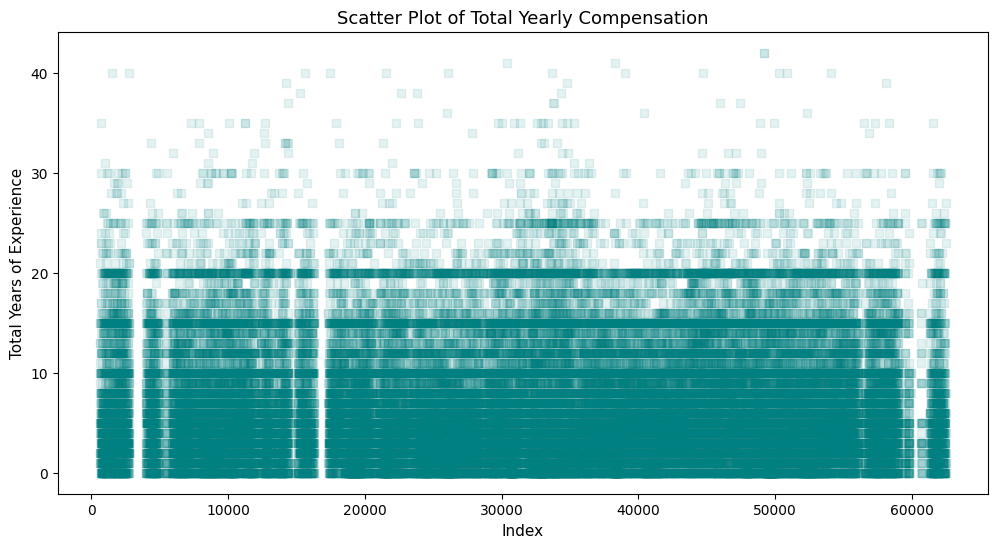

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x=us_salary_data.index, y=us_salary_data['yearsofexperience'], marker='s', color='teal', alpha=0.1)

ax.set_xlabel('Index', fontsize=11)
ax.set_ylabel('Total Years of Experience', fontsize=11)
ax.set_title('Scatter Plot of Total Yearly Compensation', fontsize=13)
ax.ticklabel_format(style='plain', axis='y', useLocale=True)

plt.show()

In [ ]:
pd.options.display.max_rows = None
print(us_salary_data.isnull().sum())

company                               3
level                                93
title                                 0
totalyearlycompensation               0
location_city                         0
location_state                        0
location_country                      0
yearsofexperience                   131
yearsatcompany                        0
gender                            17099
cityid                                0
Masters_Degree                        0
Bachelors_Degree                      0
Doctorate_Degree                      0
Highschool                            0
Some_College                          0
Race_Asian                            0
Race_White                            0
Race_Two_Or_More                      0
Race_Black                            0
Race_Hispanic                         0
Race                              35237
Education                         28406
Cost of Living Index                  0
Rent Index                            0


#### There are 131 missing values in the column "yearsofexperience".

#### Since the number is relatively small, we'll drop these values instead of replacing them with the mean:

In [ ]:
us_salary_data.dropna(subset=['yearsofexperience'], inplace=True)

In [ ]:
pd.options.display.max_rows = None
print(us_salary_data.isnull().sum())

company                               3
level                                93
title                                 0
totalyearlycompensation               0
location_city                         0
location_state                        0
location_country                      0
yearsofexperience                     0
yearsatcompany                        0
gender                            17045
cityid                                0
Masters_Degree                        0
Bachelors_Degree                      0
Doctorate_Degree                      0
Highschool                            0
Some_College                          0
Race_Asian                            0
Race_White                            0
Race_Two_Or_More                      0
Race_Black                            0
Race_Hispanic                         0
Race                              35165
Education                         28351
Cost of Living Index                  0
Rent Index                            0


# **EDA (Exploratoty Data Analysis) on United States Level**
---

#### **Getting information on salary range:**

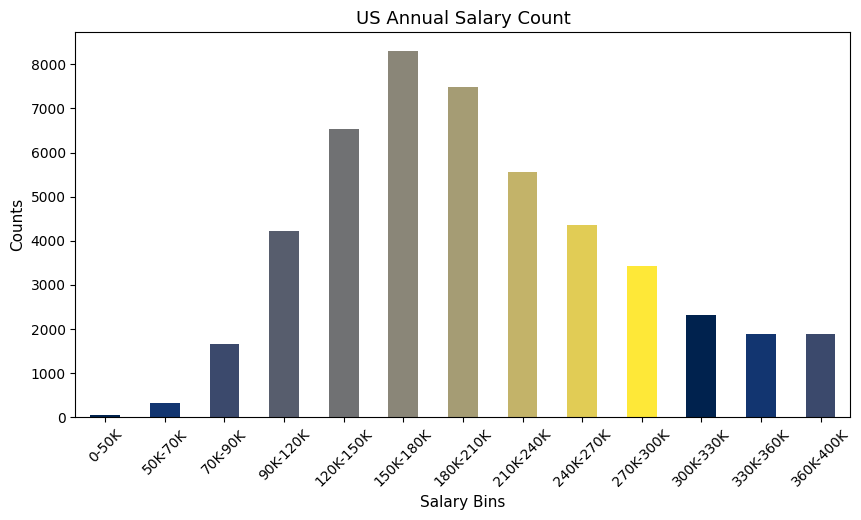

In [ ]:
colors_3 = ['#00224e', '#123570', '#3b496c', '#575d6d', '#707173', '#8a8678', '#a59c74', '#c3b369', '#e1cc55', '#fee838']
plt.figure(figsize=(10,5))
us_salary_data.groupby('Salary_Bins')['location_state'].count().plot.bar(color=colors_3)

plt.title("US Annual Salary Count", size=13)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],['0-50K','50K-70K','70K-90K','90K-120K','120K-150K','150K-180K','180K-210K','210K-240K', '240K-270K','270K-300K','300K-330K','330K-360K','360K-400K'], rotation=45)
plt.ylabel("Counts", size=11)
plt.xlabel("Salary Bins", size=11)

plt.show()

#### **Identifying States with highest paying salaries:**

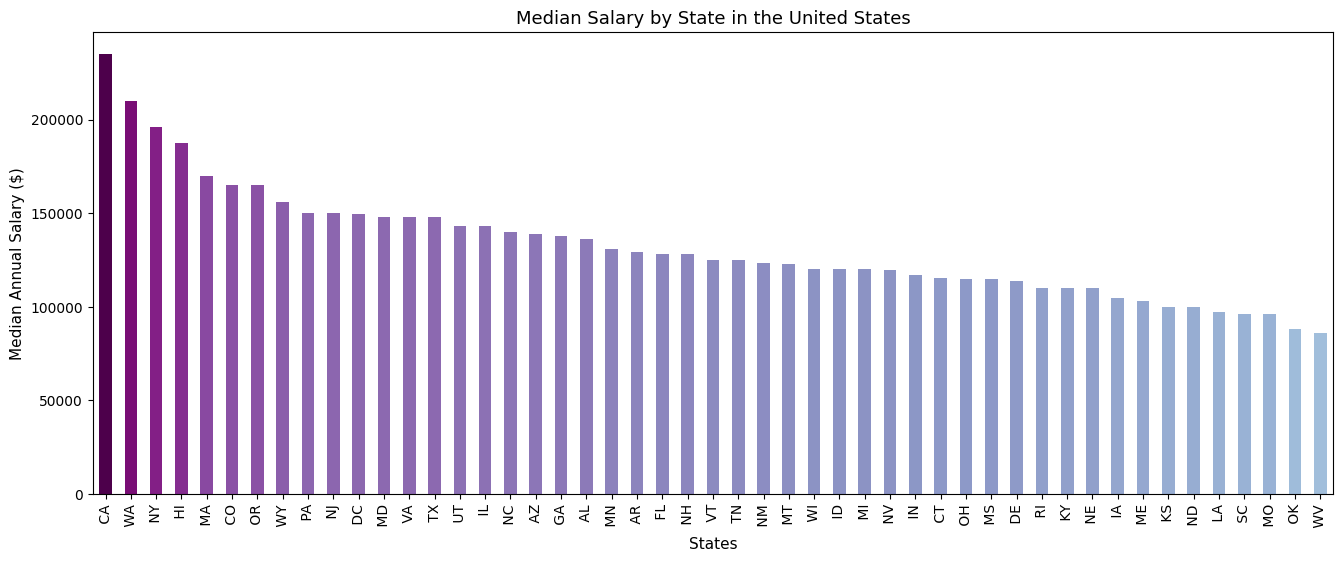

In [ ]:
plt.figure(figsize=(16,6))
us_state_salary = us_salary_data.groupby('location_state')['totalyearlycompensation'].median()
sorted_us_state_salary = us_state_salary.sort_values(ascending=False)
colors_4 = plt.cm.BuPu(sorted_us_state_salary / float(max(sorted_us_state_salary)))
sorted_us_state_salary.plot.bar(color=colors_4)

plt.title("Median Salary by State in the United States", size=13)
plt.ylabel("Median Annual Salary ($)", size=11)
plt.xlabel("States", size=11)

plt.show()

#### **Top 5 States with highest salaries:**

 #### 1. California
 #### 2. Washington
 #### 3. New York
 #### 4. Hawaii
 #### 5. **Massachusetts**

#### **Identifying top-10 companies offering highest annual salaries:**

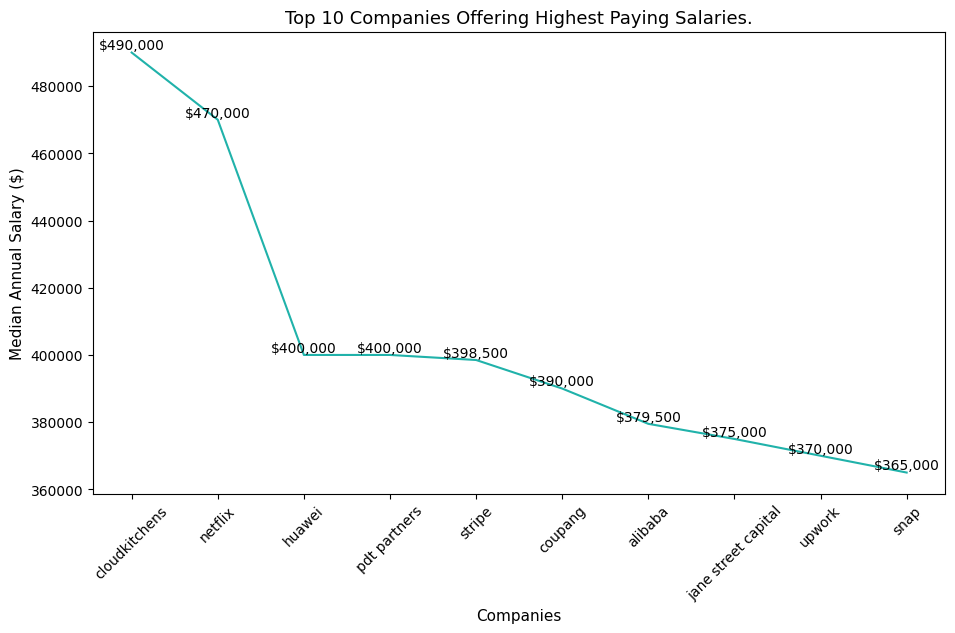

In [ ]:
grouped_data = us_salary_data.groupby('company')['totalyearlycompensation'].median()
top10_sorted_data = grouped_data.sort_values(ascending=False)

plt.figure(figsize=(11, 6))
plt.plot(top10_sorted_data[:10].index, top10_sorted_data[:10].values, color="lightseagreen")

plt.xticks(rotation=45)
plt.xlabel('Companies', fontsize=11)
plt.ylabel('Median Annual Salary ($)', fontsize=11)
plt.title('Top 10 Companies Offering Highest Paying Salaries.', fontsize=13)

for i, v in enumerate(top10_sorted_data[:10].values):
    plt.text(i, v, '${:,.0f}'.format(v), ha='center', va='bottom')

plt.show()

#### Cloud Kitchen has the highest median pay of \$490k, follow by Netflix \$470k.

#### **Visualizing the relationship between gender and annual salary:**

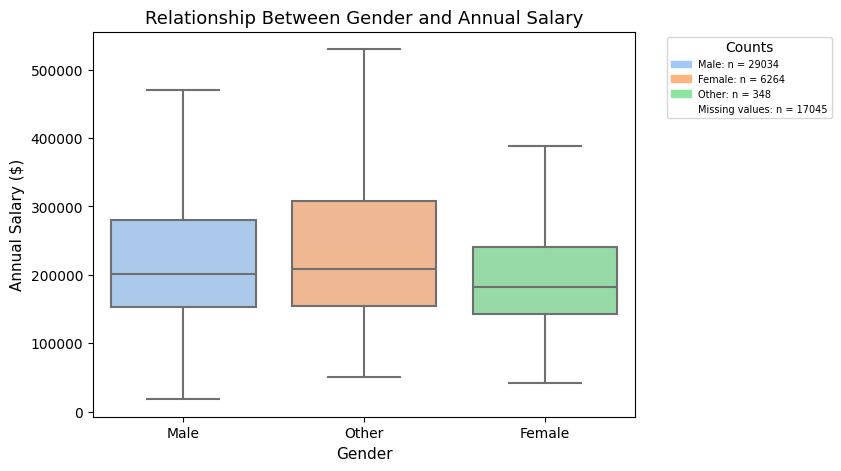

In [ ]:
missing_values_count = us_salary_data['gender'].isna().sum()

plt.figure(figsize=(7,5))
sns.boxplot(x='gender', y='totalyearlycompensation', data=us_salary_data, showfliers=False, palette="pastel")

plt.title("Relationship Between Gender and Annual Salary", fontsize=13)
plt.ylabel("Annual Salary ($)", fontsize=11)
plt.xlabel("Gender", fontsize=11)

legend_items = [mpatches.Patch(color=color, label=f'{index}: n = {value}') for index, value,
                color in zip(us_salary_data['gender'].value_counts().index, us_salary_data['gender'].value_counts().values,
                             sns.color_palette("pastel"))] + [mpatches.Patch(color='white', label=f'Missing values: n = {missing_values_count}')]
plt.legend(handles=legend_items, title='Counts', loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 7})

plt.show()

#### The above plot shows that males tend to have a higher median salary compared to females, while individuals who identify as "other" have the highest median salary. However, it is important to note that there are missing values for gender in the dataset, which could potentially affect the accuracy of the analysis.

#### **Visualizing distribution of gender:**

In [ ]:
fig = px.pie(us_salary_data, names='gender', title='Gender')
fig.update_traces(marker=dict(colors=px.colors.qualitative.Vivid))

fig.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),
    width=600,
    height=400)

fig.show()

#### The pie chart above shows the gender distribution of the salary data (submissions). The majority of the data, 55.1%, are from males, while only 11.9% are from females. There are also 0.66% of submissions from individuals who identify as "other".

#### About one-third of the submissions have null values for gender. This could be due to a variety of reasons, such as individuals choosing not to disclose their gender or missing data in the survey. The gender distribution in this dataset suggests that there may be a gender gap in the STEM industry, with males being overrepresented compared to females.

#### **Visualizing the relationship between education and annual salary:**

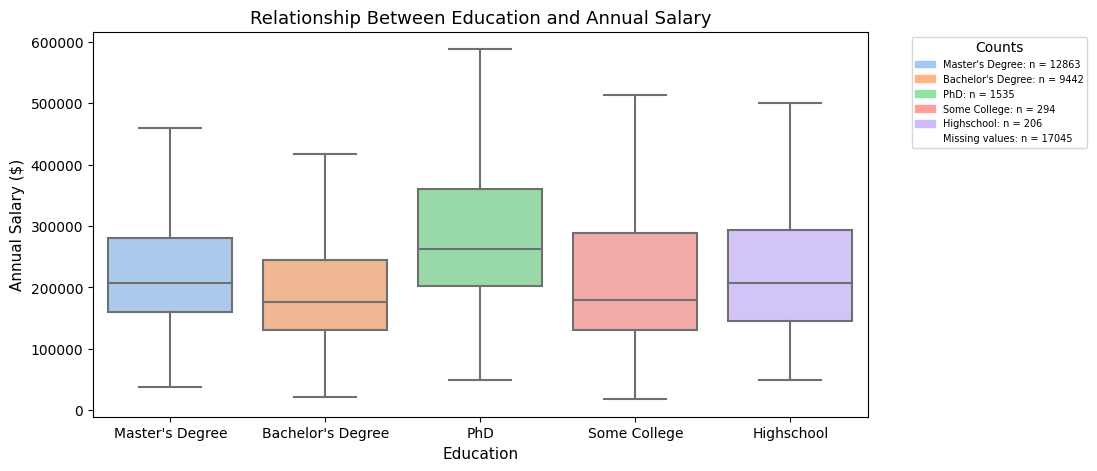

In [ ]:
missing_education_count = us_salary_data['Education'].isna().sum()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Education', y='totalyearlycompensation', data=us_salary_data, showfliers=False, palette="pastel", order=["Master's Degree","Bachelor's Degree",'PhD','Some College','Highschool'])

plt.title("Relationship Between Education and Annual Salary", fontsize=13)
plt.xlabel("Education", fontsize=11)
plt.ylabel("Annual Salary ($)", fontsize=11)

legend_items = [mpatches.Patch(color=color, label=f'{index}: n = {value}') for index, value, color in zip(us_salary_data['Education'].value_counts().index, us_salary_data['Education'].value_counts().values, sns.color_palette("pastel"))] + [mpatches.Patch(color='white', label=f'Missing values: n = {missing_values_count}')]
plt.legend(handles=legend_items, title='Counts', loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 7})

plt.show()

#### The plot suggests that individuals with a PhD tend to have the highest median salary compared to other education levels. Interestingly, the plot also indicates that individuals with a bachelor's degree tend to have the lowest median salary, which may be unexpected given the perception that a bachelor's degree is often considered a minimum requirement for many STEAM positions. One possible explanation for this could be that individuals with a bachelor's degree are more likely to be in entry-level positions, while individuals with advanced degrees (such as a master's or PhD) may have more specialized skills and experience that command higher salaries.

#### We can also see from the results above that individuals with a master's degree have a median salary that is similar to those with "some college," which may also be unexpected given the additional years of education required for a master's degree. One possible explanation could be that individuals with "some college" may have acquired specialized skills and experience through vocational training or certification programs that are relevant to STEAM positions, which could make them competitive for higher-paying positions.

#### **Visualizing the correlation between positions, education level and annual salary:**

In [ ]:
grouped_data_4 = us_salary_data.loc[us_salary_data['title'].notnull()].groupby(['Education', 'title'])['totalyearlycompensation'].median().reset_index()

fig = px.scatter(grouped_data_4, x='title', y='totalyearlycompensation', color='Education', title='Correlation Between Positions, Education Level, and Annual Salary',
                 labels={'title': 'Job Position', 'totalyearlycompensation': 'Annual Salary ($)', 'Education': 'Education Level'},
                 color_discrete_sequence=px.colors.qualitative.Dark24,  width=1000, height=800)

fig.update_layout(xaxis={'tickangle': -45}, plot_bgcolor="white", paper_bgcolor="white", yaxis_gridcolor="lightgray", xaxis_gridcolor="lightgray", legend=dict(title='Education Level', orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))

fig.show()

#### **Examining fluctuations in compensation over the years:**

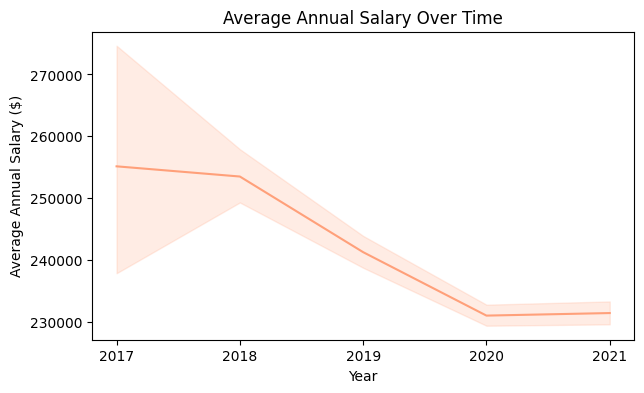

In [ ]:
plt.figure(figsize=(7, 4))
avg_compensation = us_salary_data['totalyearlycompensation'].median()
sns.lineplot(x=us_salary_data['year'], y=us_salary_data['totalyearlycompensation'], color="lightsalmon")

plt.title('Average Annual Salary Over Time', size=12)
plt.xlabel('Year', size=10)
plt.ylabel('Average Annual Salary ($)', size=10)
plt.xticks([2017,2018,2019,2020,2021])

plt.show()

#### We can see from the plot above that the median salary in 2017 was around \$250,000-\$260,000, and it dropped slightly in 2018 before decreasing more significantly in 2019 to almost \$240,000. The trend continued in 2020 with an average salary of almost \$230,000 and remained relatively stable in 2021, just above \$230,000.

#### The decrease in salaries starting in 2019 could be attributed to various factors, including the impact of Covid-19 on the economy and job market.

#### **Visualizing the effect of years of experience in annual salaries:**

In [ ]:
fig = px.scatter(us_salary_data, x="yearsofexperience", y="totalyearlycompensation", trendline="ols",
                 title="Years of Experience vs Annual Salary ($)",
                 labels={"yearsofexperience": "Years of Experience", "totalyearlycompensation": "Annual Salaries ($)"},
                 render_mode="webgl", color_discrete_sequence=["blue"])

fig.update_traces(marker=dict(size=4, opacity=0.5, color='darkblue'))
fig.update_traces({'line': {'color': 'red'}})
fig.update_layout(plot_bgcolor="white", paper_bgcolor="white", xaxis_gridcolor="lightgray", yaxis_gridcolor="lightgray",
                  width=1200, height=700)

fig.show()

#### As years of experience increase, the annual salary tends to increase as well. The trendline confirms this relationship by showing a statistically significant positive slope. This means that (on average), for every additional year of experience, the annual salary increases by a certain amount, as indicated by the slope of the trendline.

#### **Visualizing data submissions by year:**

In [ ]:
fig = px.bar(us_salary_data['title'].value_counts().head(10), orientation = 'h',
             title = 'Submissions - Top 10 Job Titles', text_auto = True,
             labels ={'index':'Job Title', 'value':'Count'},
             color = 'value', width=1200, height=550)

fig.update_layout(yaxis={'categoryorder':'total ascending'}, plot_bgcolor="white", paper_bgcolor="white", yaxis_gridcolor="lightgray", xaxis_gridcolor="lightgray")

#### The results show the number of submissions for the top 10 job titles, with Software Engineer having the highest number of submissions at 34,130. This indicates that Software Engineering is a popular job title among the survey participants. Product Manager and Software Engineering Manager follow with 4,177 and 3,036 submissions respectively. The other job titles in the top 10 also received a considerable number of submissions, but not as much as these top three job titles.

#### **Visualizing the companies with the highest number of submissions: Top 10**

In [ ]:
fig = px.bar(us_salary_data['company'].value_counts().head(10),
       orientation = 'h',
       title = 'Submissions - Top 10 Companies',
       text_auto = True,
       labels ={'index':'Company', 'value':'Count'},
       color = 'value', width=1200, height=550)

fig.update_layout(yaxis={'categoryorder':'total ascending'}, plot_bgcolor="white", paper_bgcolor="white", yaxis_gridcolor="lightgray", xaxis_gridcolor="lightgray")

#### **The Big Tech companies** - Amazon, Apple, Google, Facebook and Microsoft are the top 5 company that offers STEM positions.

#### **Visualizing top 10 locations:**

In [ ]:
top10Loc = px.bar(us_salary_data['location_city'].value_counts().head(10),
                  orientation = 'h',
                  title = 'Top 10 Locations',
                  text_auto = True,
                  labels ={'index':'City', 'value':'Count'},
                  color = 'value', width=1200, height=550)

top10Loc.update_layout(yaxis={'categoryorder':'total ascending'}, plot_bgcolor="white", paper_bgcolor="white", yaxis_gridcolor="lightgray", xaxis_gridcolor="lightgray")

#### It's no surprise that Seattle, where Amazon's headquarters is located, has the highest number of STEM positions. San Francisco and New York follow closely behind. Together, these three cities account for over 30% of the salary submissions.

#### **Visualizing correlation between years at company and annual salaries:**

In [ ]:
fig = px.scatter(us_salary_data, x="yearsatcompany", y="totalyearlycompensation", trendline="ols",
                 title="Years at Company vs Annual Salaries ($)",
                 labels={"yearsatcompany": "Years at Company", "totalyearlycompensation": "Annual Salary ($)"},
                 render_mode="webgl", color_discrete_sequence=["blue"])

fig.update_traces(marker=dict(size=6, opacity=0.5, color='darkgreen'))
fig.update_traces({'line': {'color': 'red'}})
fig.update_layout(plot_bgcolor="white", paper_bgcolor="white", xaxis_gridcolor="lightgray", yaxis_gridcolor="lightgray",
                  width=1750, height=670)

fig.show()

#### The plot above indicates that as years at the company increase, so does the total yearly compensation (on average).

#### **Visualizing correlation between years of experience, annual salaries and job titles:**

In [ ]:
fig = px.scatter(us_salary_data, x="yearsofexperience", y="totalyearlycompensation", color="title",
                 title="Years of Experience vs Annual Salaries by Job Title",
                 labels={"yearsofexperience": "Years of Experience", "totalyearlycompensation": "Annual Salary ($)"},
                 color_discrete_sequence=px.colors.qualitative.Vivid, width=1750, height=670)

fig.update_layout(plot_bgcolor="white", paper_bgcolor="white", yaxis_gridcolor="lightgray", xaxis_gridcolor="lightgray")

fig.show()

#### The position of Software Engineer Manager have a higher total yearly compensation.

#### **Visualizing correlation between years of experience, annual salaries and gender:**

In [ ]:
color_map = {'Male': 'blue', 'Female': 'red', 'Other': 'lime'}
fig = px.scatter(us_salary_data, x="yearsofexperience", y="totalyearlycompensation", color="gender",
                 title="Years of Experience vs Annual Salaries Based on Gender", labels={"yearsofexperience": "Years of Experience", "totalyearlycompensation": "Annual Salary ($)"},
                 width=1500, height=800, color_discrete_map=color_map)

fig.update_layout(plot_bgcolor="white", paper_bgcolor="white", yaxis_gridcolor="lightgray", xaxis_gridcolor="lightgray")

fig.show()

#### **Identifying average cost of living and average rent by state:**

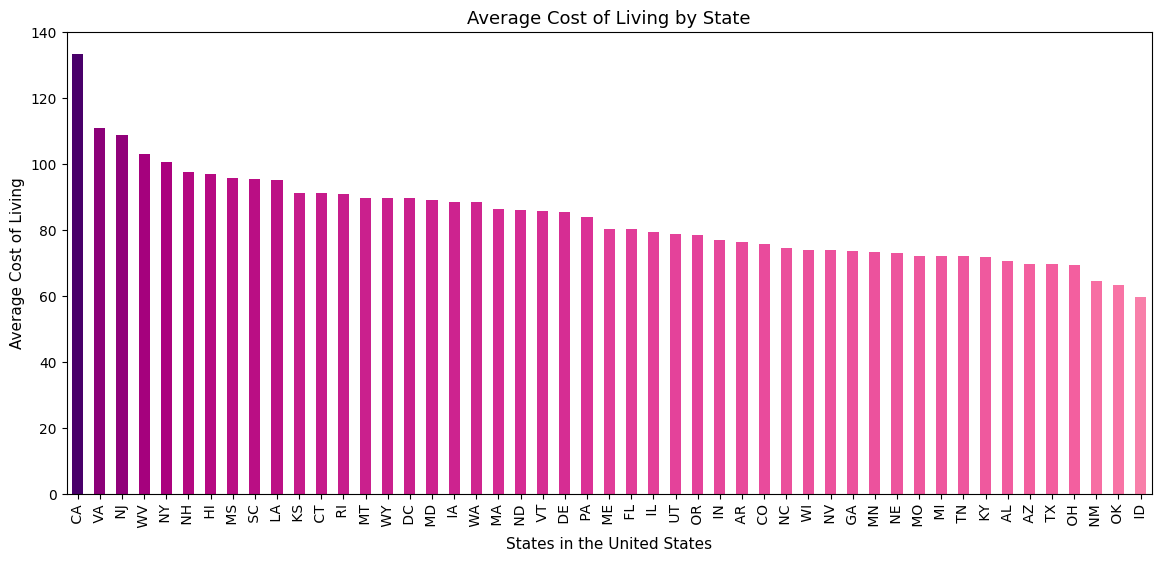

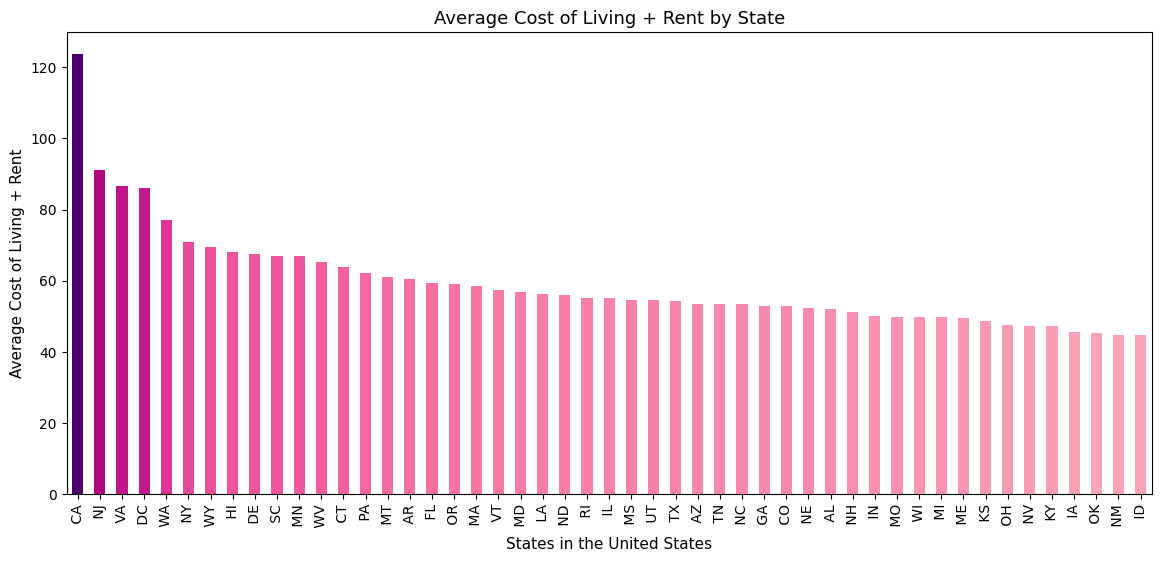

In [ ]:
plt.figure(figsize=(14,6))
city_indexes = us_salary_data.groupby('location_state')['Cost of Living Index'].mean()
city_indexes_sorted = city_indexes.sort_values(ascending=False)
colors = plt.cm.RdPu(city_indexes_sorted / float(max(city_indexes_sorted)))
city_indexes_sorted.plot.bar(color=colors)

plt.title("Average Cost of Living by State", size=13)
plt.ylabel("Average Cost of Living", size=11)
plt.xlabel("States in the United States", size=11)

plt.show()


plt.figure(figsize=(14,6))
city_indexes3 = salary_data.loc[salary_data['location_country'] == 'United States'].groupby('location_state')['Cost of Living Plus Rent Index'].mean()
city_indexes3_sorted = city_indexes3.sort_values(ascending=False)
colors = plt.cm.RdPu(city_indexes3_sorted / float(max(city_indexes3_sorted)))
city_indexes3_sorted.plot.bar(color=colors)

plt.title("Average Cost of Living + Rent by State", size=13)
plt.ylabel("Average Cost of Living + Rent", size=11)
plt.xlabel("States in the United States", size=11)

plt.show()

#### The first graph above shows the average cost of living by state, with California having the highest cost of living followed by Virginia and New York. The second graph shows the average cost of living plus rent by state, with California still having the highest cost of living plus rent, followed now by New York and then Virginia.

#### When adding the rent index in the second graph, the ranking of states changed possibly due to a variety of factors such as differences in housing costs and taxes.

#### **Checking relationship between purchasing power and cost of living + rent:**

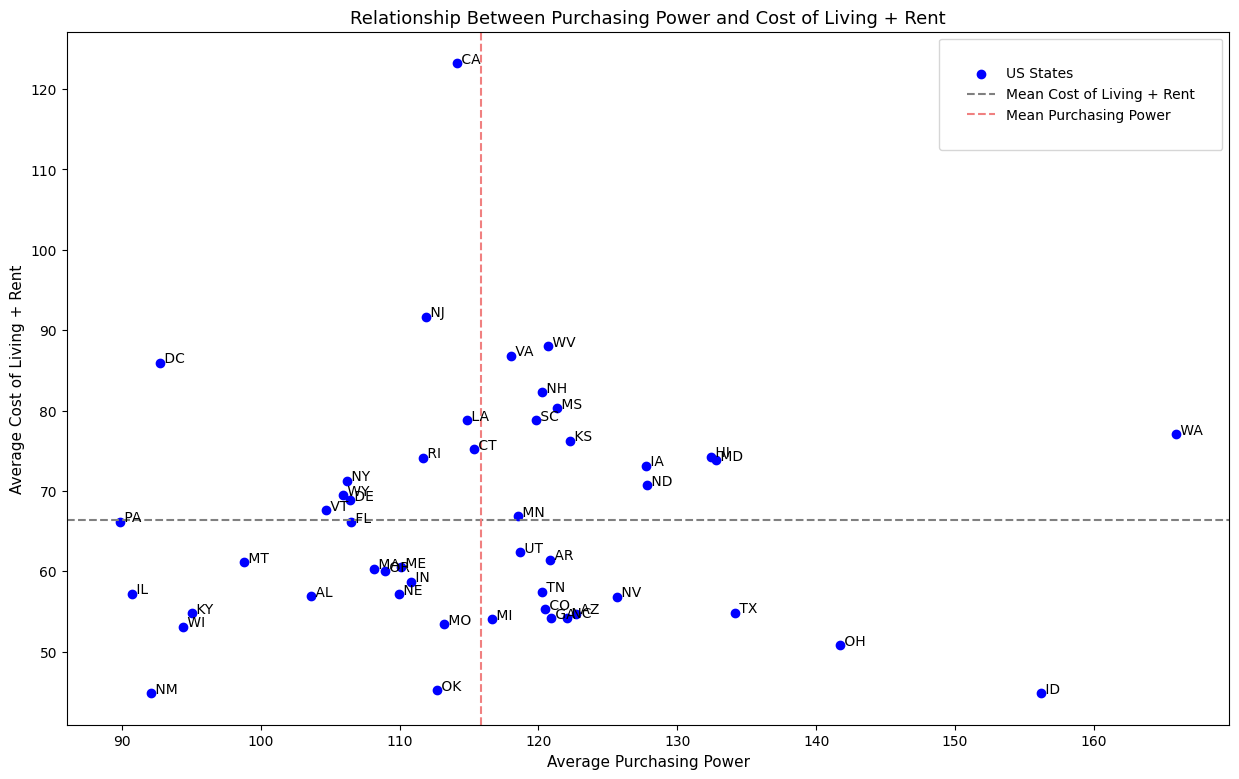

In [ ]:
index_data = us_salary_data.groupby('location_state')['Local Purchasing Power Index'].mean()
index_data2 = us_salary_data.groupby('location_state')['Cost of Living Plus Rent Index'].mean()

plt.figure(figsize=(15, 9))
x = index_data
y = index_data2
labels = index_data.index
plt.scatter(x, y, label='US States', color="blue")

for i, label in enumerate(labels):
  plt.annotate(label, (x[i], y[i]))

plt.title('Relationship Between Purchasing Power and Cost of Living + Rent', size=13)
plt.xlabel('Average Purchasing Power', size=11)
plt.ylabel('Average Cost of Living + Rent', size=11)

plt.axhline(y=index_data2.mean(), color='gray', linestyle='--', label='Mean Cost of Living + Rent')
plt.axvline(x=index_data.mean(), color='lightcoral', linestyle='--', label='Mean Purchasing Power')

plt.legend(loc='upper right', borderpad=2)

plt.show()

## **Feature Engineering & Selection**
---

#### **Performing one-hot encoding for "titles":**

In [ ]:
job_title_dummies = pd.get_dummies(us_salary_data.title)
us_salary_data.drop(labels="title", axis=1, inplace=True)
us_salary_data = us_salary_data.join(job_title_dummies)

#### **Performing one-hot encoding for "gender":**

In [ ]:
gender_dummies = pd.get_dummies(us_salary_data.gender)
us_salary_data.drop(labels="gender", axis=1, inplace=True)
us_salary_data = us_salary_data.join(gender_dummies)

#### **Checking to see if we have duplicate values for "states":**

In [ ]:
print(us_salary_data['location_state'].unique())

[' MD' ' CA' ' NY' ' NM' ' VA' ' MI' ' TX' ' PA' ' GA' ' UT' ' IA' ' MA'
 ' TN' ' AZ' ' IL' ' CO' ' NJ' ' LA' ' OR' ' WI' ' ID' ' OH' ' WA' ' AR'
 ' CT' ' AL' ' IN' ' MN' ' FL' ' NC' ' MT' ' VT' ' KY' ' MO' ' SC' ' WV'
 ' WY' ' ME' ' DE' ' NH' ' ND' ' HI' ' RI' ' KS' ' NV' ' NE' ' MS' ' OK'
 ' DC']


#### We'll be grouping states into regions as it can simplify the number of variables, reduce complexity, capture shared characteristics, and increase the number of data points for each region, leading to more accurate prediction compared to using one-hot encoding for all 50 states.

In [ ]:
us_salary_data['location_state'] = us_salary_data['location_state'].str.strip()

In [ ]:
def get_region(state):
    northeast = ['CT', 'ME', 'MA', 'NH', 'NJ', 'NY', 'PA', 'RI', 'VT', 'DC']
    south = ['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']
    midwest = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']
    west = ['AZ', 'CA', 'CO', 'ID', 'MT', 'NV', 'NM', 'OR', 'UT', 'WA', 'WY', 'AK', 'HI']

    if state in northeast:
        return 'Northeast'
    elif state in south:
        return 'South'
    elif state in midwest:
        return 'Midwest'
    elif state in west:
        return 'West'
    else:
        return 'Unknown'

us_salary_data['region'] = us_salary_data['location_state'].apply(get_region)

#### **Performing one-hot encoding for "regions":**

In [ ]:
region_dummies = pd.get_dummies(us_salary_data.region)
us_salary_data.drop(labels="region", axis=1, inplace=True)
us_salary_data = us_salary_data.join(region_dummies)

In [ ]:
us_salary_data.columns

Index(['company', 'level', 'totalyearlycompensation', 'location_city',
       'location_state', 'location_country', 'yearsofexperience',
       'yearsatcompany', 'cityid', 'Masters_Degree', 'Bachelors_Degree',
       'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian',
       'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race',
       'Education', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index', 'Salary_Bins',
       'year', 'Business Analyst', 'Data Scientist', 'Hardware Engineer',
       'Human Resources', 'Management Consultant', 'Marketing',
       'Mechanical Engineer', 'Product Designer', 'Product Manager',
       'Recruiter', 'Sales', 'Software Engineer',
       'Software Engineering Manager', 'Solution Architect',
       'Technical Program Manager', 'Female', 'Male', 'Other', 'Midwest',
       'Northeast', 'South', 'West'],
      dtype

#### **Dropping:**

- **"cityid"** - As its information is already represented in the **location_city** column, and there is no way to verify the **cityid** values.

- **"Race"** - As we already have dummies for each race.

- **"level"** - As it is hard to know what exact level the data is referring to without the full name.

- **"Education"** - As we already have dummies for each education level.

In [ ]:
us_salary_data = us_salary_data.drop(['cityid', 'Race', 'level', 'Education'], axis=1)

In [ ]:
us_salary_data.columns

Index(['company', 'totalyearlycompensation', 'location_city', 'location_state',
       'location_country', 'yearsofexperience', 'yearsatcompany',
       'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More',
       'Race_Black', 'Race_Hispanic', 'Cost of Living Index', 'Rent Index',
       'Cost of Living Plus Rent Index', 'Groceries Index',
       'Restaurant Price Index', 'Local Purchasing Power Index', 'Salary_Bins',
       'year', 'Business Analyst', 'Data Scientist', 'Hardware Engineer',
       'Human Resources', 'Management Consultant', 'Marketing',
       'Mechanical Engineer', 'Product Designer', 'Product Manager',
       'Recruiter', 'Sales', 'Software Engineer',
       'Software Engineering Manager', 'Solution Architect',
       'Technical Program Manager', 'Female', 'Male', 'Other', 'Midwest',
       'Northeast', 'South', 'West'],
      dtype='object')

In [ ]:
us_salary_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52691 entries, 648 to 62468
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   company                         52688 non-null  object 
 1   totalyearlycompensation         52691 non-null  int64  
 2   location_city                   52691 non-null  object 
 3   location_state                  52691 non-null  object 
 4   location_country                52691 non-null  object 
 5   yearsofexperience               52691 non-null  float64
 6   yearsatcompany                  52691 non-null  float64
 7   Masters_Degree                  52691 non-null  int64  
 8   Bachelors_Degree                52691 non-null  int64  
 9   Doctorate_Degree                52691 non-null  int64  
 10  Highschool                      52691 non-null  int64  
 11  Some_College                    52691 non-null  int64  
 12  Race_Asian                    

# **Modeling**

---

#### **Only numerical columns will be used as predictors, and the categorical variables "company," "location_city," and "location_state" will be excluded.**

- "company": hot-encoding all the company names will create a large number of variables, making the model more complex and harder to interpret.
- "location_state": used to create "regions".
- "location_country": only contains values from the United States as we've created a new dataset named "us_salary_data" at the beginning of this notebook.

#### **We'll also be excluding:**
- "Cost of Living Index" and "Rent Index": as we'll be using "Cost of Living + Rent Index".
- "Groceries Index" and "Restaurant Price Index": as these values are already included in "Cost of Living Index + Rent Index".
- "Salary_Bins": created only for visualizations.
- "Human Resources", "Marketing", "Recruiter" and "Sales": as these are not STEM positions.

---


#### **"totalyearlycompensation"** will be our **target variable**.

In [ ]:
predictors = ['yearsofexperience', 'yearsatcompany', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Cost of Living Plus Rent Index',
       'Local Purchasing Power Index', 'year', 'Business Analyst', 'Data Scientist', 'Hardware Engineer', 'Management Consultant',
       'Mechanical Engineer', 'Product Designer', 'Product Manager', 'Software Engineer', 'Software Engineering Manager', 'Solution Architect',
       'Technical Program Manager', 'Female', 'Male', 'Other', 'Northeast', 'South', 'West', 'Midwest']

#### **Plotting a correlation matrix to see the relationships between the predictors and target variable:**

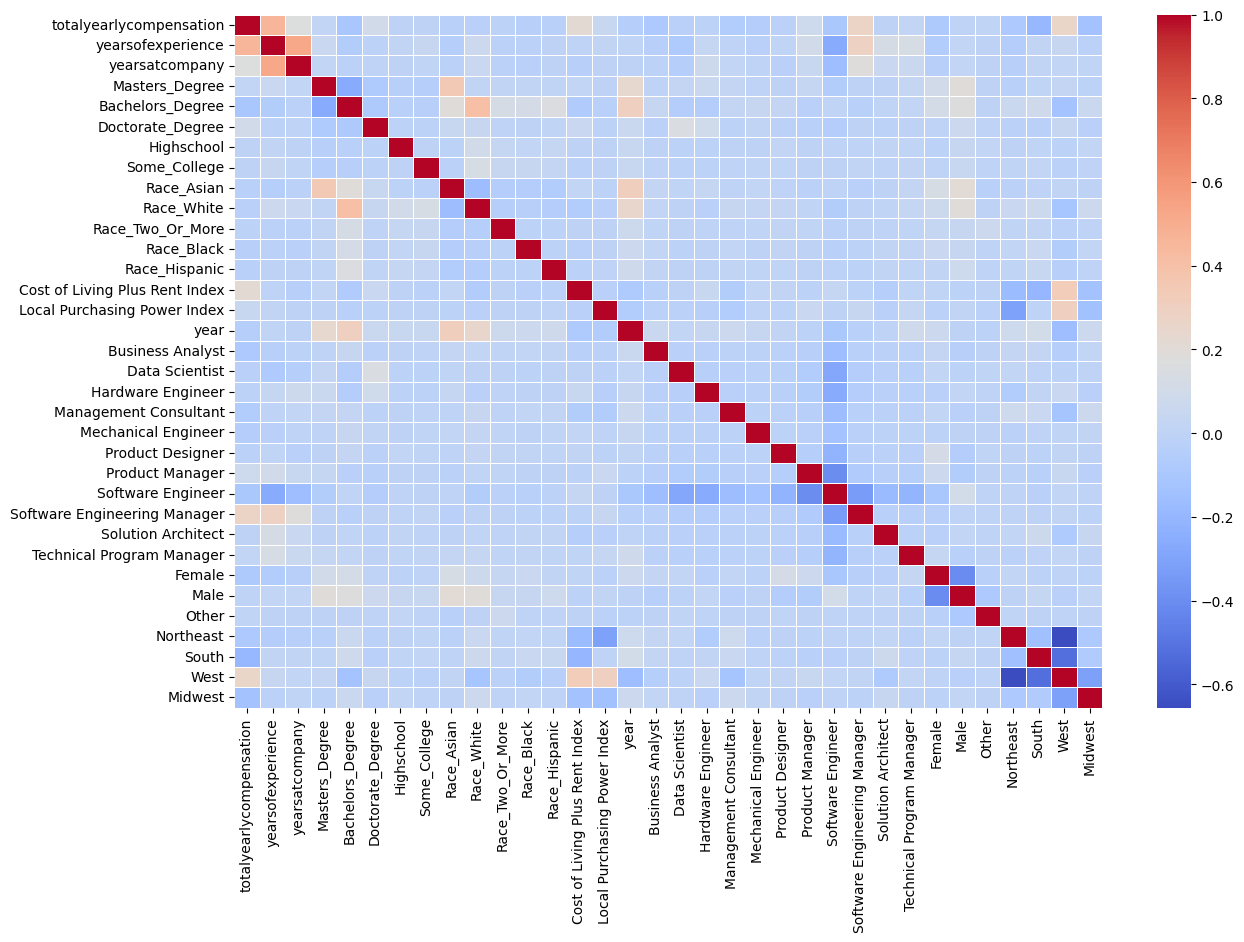

In [ ]:
selected_columns = ['totalyearlycompensation'] + predictors

df_selected_columns = us_salary_data[selected_columns]
corr_matrix = df_selected_columns.corr()

plt.figure(figsize=(14, 9))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.show()

#### Because the data is heavily skewed, we'll be applying a logarithm transformation to 'totalyearlycompensation' to help normalize the data distribution, making it more suitable for further analysis or modeling.

In [ ]:
us_salary_data['totalyearlycompensation'] = np.log(us_salary_data['totalyearlycompensation'])

In [ ]:
us_salary_data['totalyearlycompensation']

648      11.277203
649      12.061047
650      12.206073
651      12.196022
652      12.611538
653      11.362103
654      11.938193
655      11.711776
656      12.072541
657      11.652687
658      11.326596
659      11.951180
660      12.669807
661      11.561716
662      11.751942
663      11.775290
664      11.790557
665      11.669929
666      11.580584
667      11.492723
668      11.512925
669      12.468437
670      11.736069
671      11.542484
672      11.608236
673      11.849398
674      11.813030
675      12.323856
676      12.464583
677      12.154779
678      12.388394
679      11.652687
680      11.608236
681      11.289782
682      12.278393
683      11.326596
684      11.877569
685      11.767568
686      11.827736
687      11.608236
688      11.350407
689      11.350407
690      11.608236
691      11.552146
692      11.522876
693      11.589887
694      12.517227
695      11.775290
696      12.111762
697      11.350407
698      11.112448
699      11.461632
700      11.

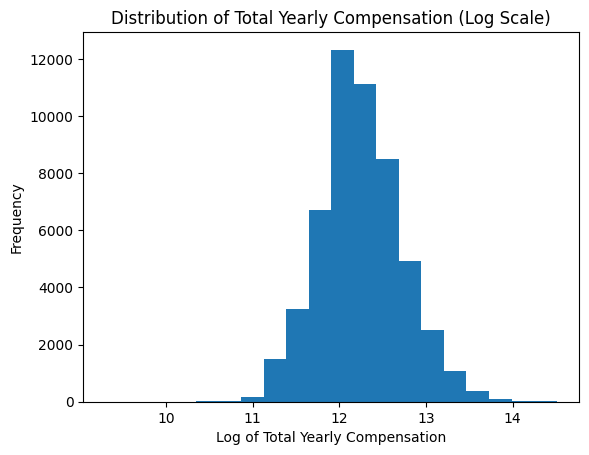

In [ ]:
plt.hist(us_salary_data['totalyearlycompensation'], bins=20)
plt.xlabel('Log of Total Yearly Compensation')
plt.ylabel('Frequency')
plt.title('Distribution of Total Yearly Compensation (Log Scale)')

plt.show()

#### **We'll be running the following models:**

- Decision Tree
- Linear regression
- Cross-validation
- KNN Regression
- Ridge Regression
- Lasso Regression
- Elastic Net

#### Splitting the dataset into two sets - one for training and the other for testing. The training set will be 70% of the data, while the testing set will be 30%.

In [ ]:
X1 = us_salary_data[predictors]
Y1 = us_salary_data['totalyearlycompensation']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 1)

In [ ]:
print(X1_train.shape, y1_train.shape)
print(X1_test.shape, y1_test.shape)

(36883, 33) (36883,)
(15808, 33) (15808,)


# **Decision Tree:**

---

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X1_train[predictors], y1_train)

DecisionTreeRegressor()

#### **Predicting on training data:**

In [ ]:
y_hat_train = dt.predict(X1_train[predictors])
mse_train = mean_squared_error(y1_train, y_hat_train)

mse_train

0.01741258315745727

#### **Predicting on test data:**

In [ ]:
y_hat_test = dt.predict(X1_test[predictors])
mse_test = mean_squared_error(y_hat_test, y1_test)

mse_test

0.17916220155927942

#### **Train MSE:** 0.017412583157457265

#### **Test MSE:** 0.17955242332912769

#### From the train and test MSE, we can see that the model is overfitting the training data, meaning that it's learning the noise in the data instead of the underlying pattern, which usually results in low error on the training set but a much higher error on the test set, which is the case here.

In [ ]:
dt.feature_importances_

feature_imp = pd.DataFrame({"Feature": X1.columns, "Coefficient": dt.feature_importances_})
print(feature_imp)

                           Feature  Coefficient
0                yearsofexperience     0.339473
1                   yearsatcompany     0.097360
2                   Masters_Degree     0.017982
3                 Bachelors_Degree     0.013779
4                 Doctorate_Degree     0.012779
5                       Highschool     0.001295
6                     Some_College     0.002228
7                       Race_Asian     0.013643
8                       Race_White     0.013597
9                 Race_Two_Or_More     0.003059
10                      Race_Black     0.002843
11                   Race_Hispanic     0.004626
12  Cost of Living Plus Rent Index     0.153134
13    Local Purchasing Power Index     0.063939
14                            year     0.051382
15                Business Analyst     0.006079
16                  Data Scientist     0.007771
17               Hardware Engineer     0.003936
18           Management Consultant     0.003251
19             Mechanical Engineer     0

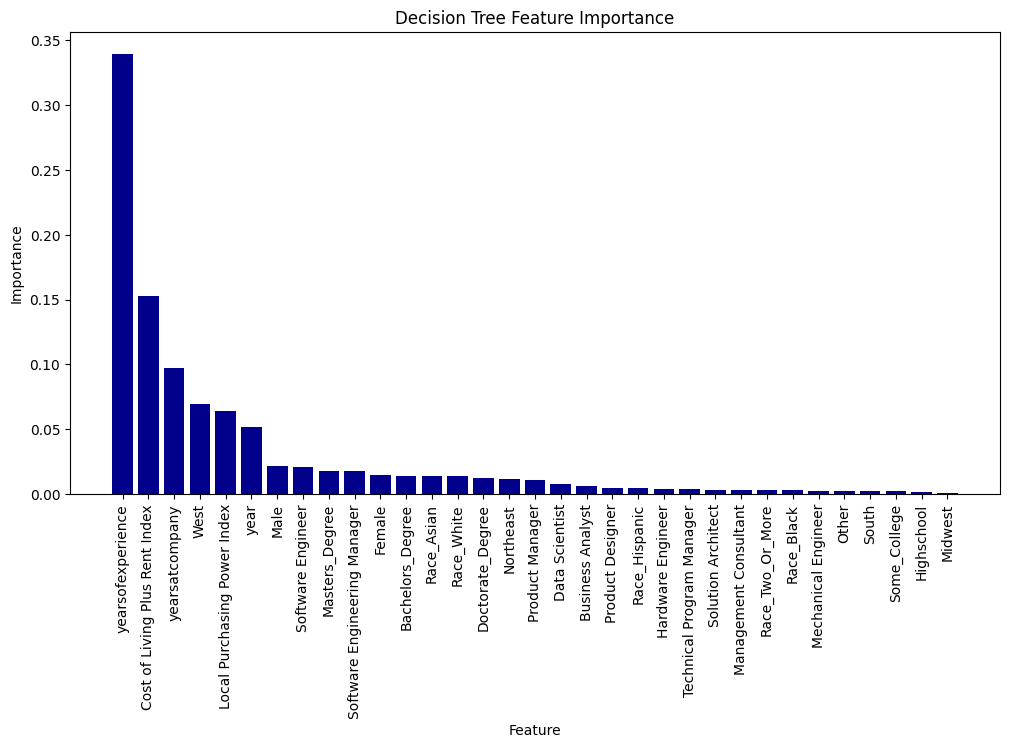

In [ ]:
feature_imp_2 = feature_imp.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(12,6))
plt.bar(feature_imp_2['Feature'], feature_imp_2['Coefficient'], color='darkblue')

plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importance')
plt.show()

#### As seen from the results above, some of the coefficients for the "race" category are relatively small compared to other predictors, suggesting that race does not have a significant impact on the outcome.

#### - Because "race" is not a particularly informative or relevant predictor for most jobs, as it does not reflect an individual's skills, experience, or qualifications, we'll be removing the race category alltogether from the predictors variable.
#### - By removing these predictors, we can simplify the models and reduce the risk of overfitting, as it eliminates potential sources of bias and discrimination.

In [ ]:
predictors1 = ['yearsofexperience', 'yearsatcompany', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool',
       'Some_College', 'Cost of Living Plus Rent Index', 'Local Purchasing Power Index', 'year', 'Business Analyst', 'Data Scientist',
       'Hardware Engineer', 'Management Consultant', 'Mechanical Engineer', 'Product Designer', 'Product Manager', 'Software Engineer',
       'Software Engineering Manager', 'Solution Architect', 'Technical Program Manager', 'Female', 'Male', 'Other', 'Northeast', 'South', 'West', 'Midwest']

In [ ]:
X = us_salary_data[predictors1]
Y = us_salary_data['totalyearlycompensation']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(36883, 28) (36883,)
(15808, 28) (15808,)


# **Linear Regression:**

---

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

model.coef_, model.intercept_
coeff_df = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print(coeff_df)

                           Feature  Coefficient
0                yearsofexperience     0.040283
1                   yearsatcompany    -0.013833
2                   Masters_Degree     0.021225
3                 Bachelors_Degree    -0.044148
4                 Doctorate_Degree     0.259964
5                       Highschool    -0.043406
6                     Some_College    -0.156392
7   Cost of Living Plus Rent Index     0.001252
8     Local Purchasing Power Index     0.000118
9                             year     0.007594
10                Business Analyst    -0.157040
11                  Data Scientist     0.198956
12               Hardware Engineer     0.112360
13           Management Consultant     0.049433
14             Mechanical Engineer    -0.104064
15                Product Designer     0.136817
16                 Product Manager     0.252898
17               Software Engineer     0.211766
18    Software Engineering Manager     0.424849
19              Solution Architect     0

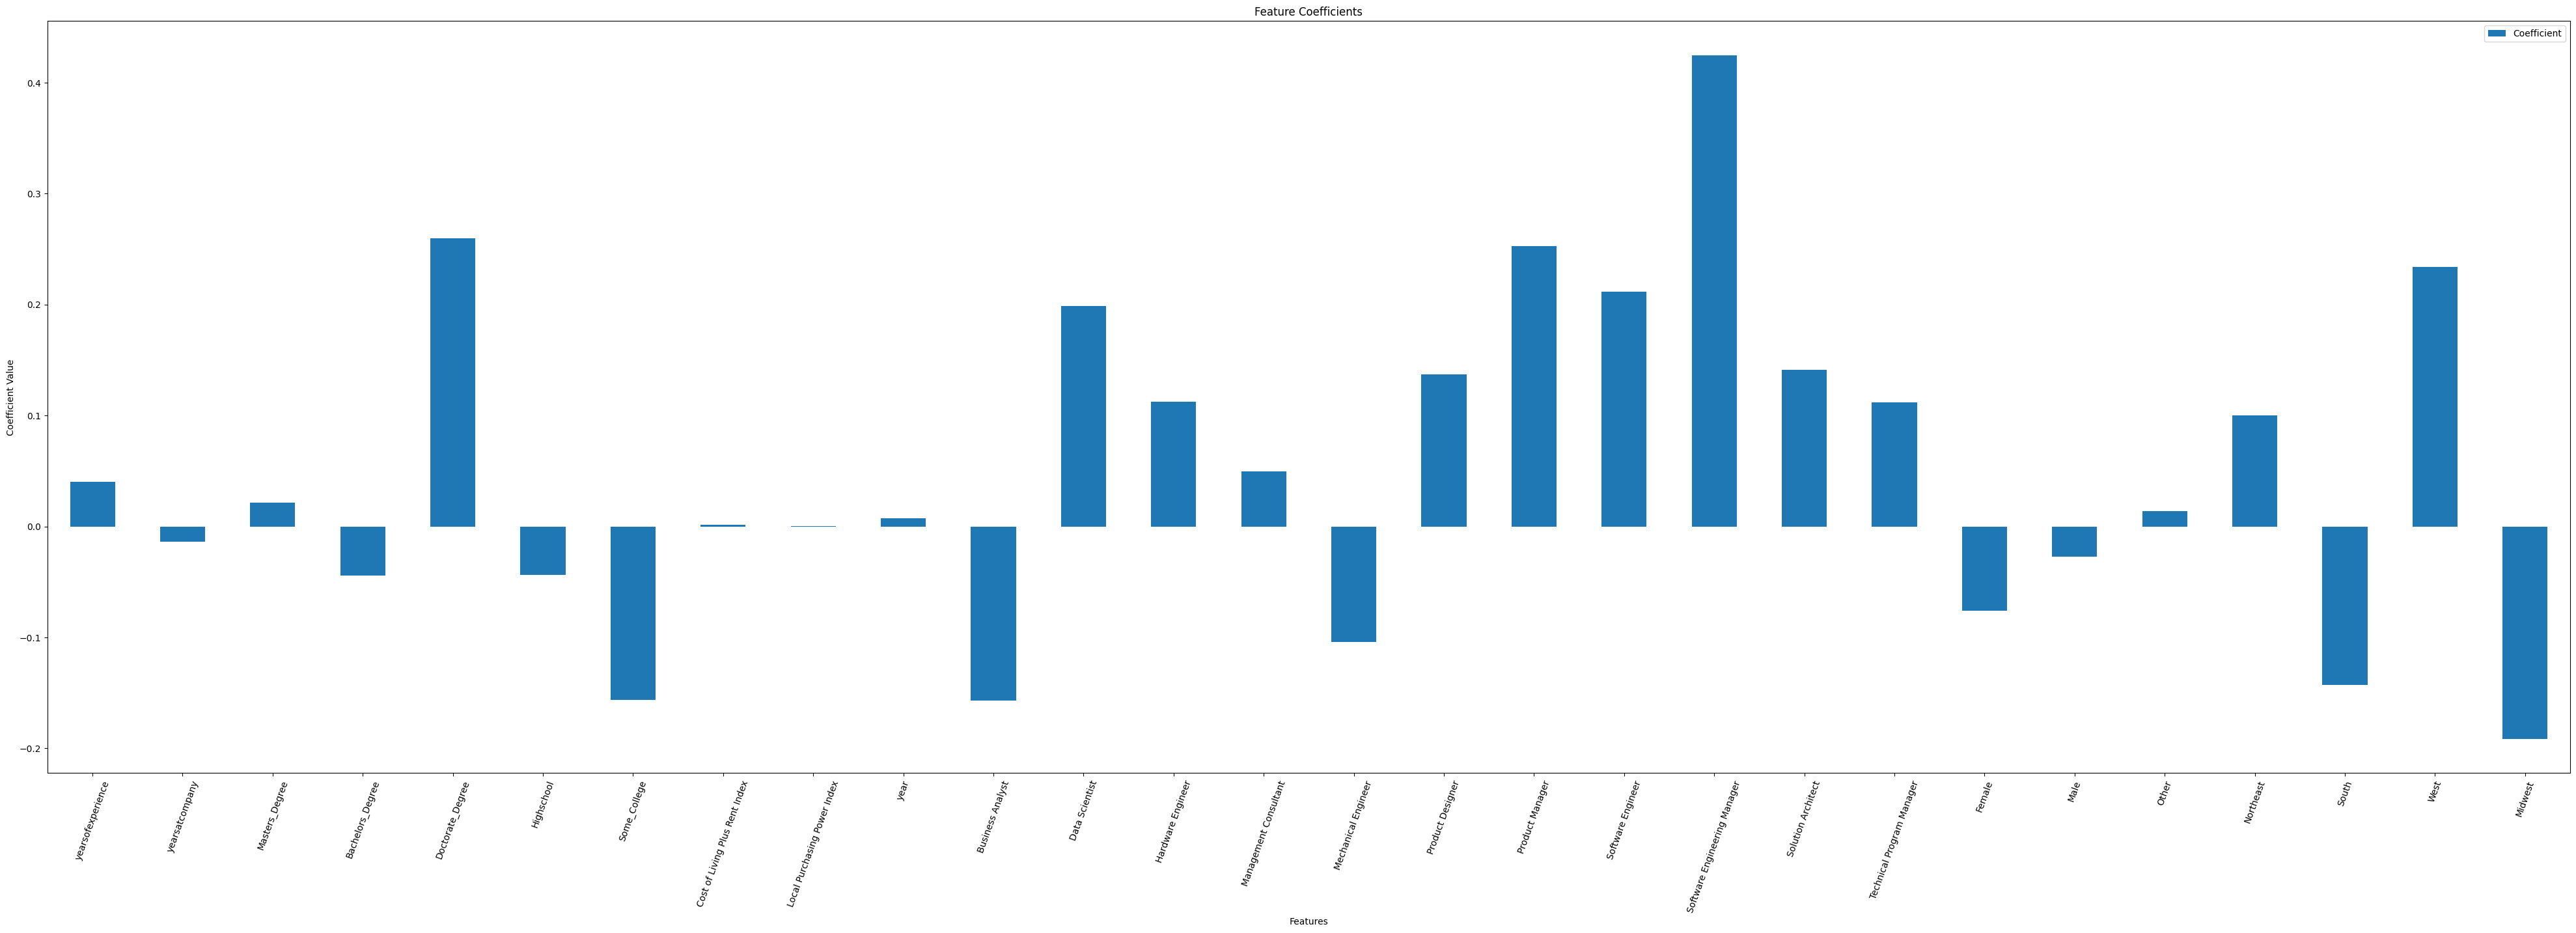

In [ ]:
fig, ax = plt.subplots(figsize=(50, 15))
coeff_df.plot(kind='bar', x='Feature', y='Coefficient', ax=ax)

ax.set_title('Feature Coefficients')
ax.set_xlabel('Features')
ax.set_ylabel('Coefficient Value')

plt.xticks(rotation=70)
plt.show()

#### **Predicting on training data:**

In [ ]:
y_train_fit = model.predict(X_train)

mse_train = np.mean((y_train - y_train_fit)**2)
print("Train RMSE:", np.sqrt(mse_train))
print("Train MSE:", mse_train)

Train RMSE: 0.35938853620543415
Train MSE: 0.12916011995588464


#### **Predicting on test data:**

In [ ]:
y_test_fit = model.predict(X_test)
mse_test = np.mean( (y_test - y_test_fit)**2 )
print("Test RMSE:", np.sqrt(mse_test))
print("Test MSE:", mse_test)

Test RMSE: 0.36025820000874575
Test MSE: 0.12978597067354147


#### The training and test RMSE and MSE values are quite close, which is a good sign. It's indicating that your model is performing reasonably well on both the training and test sets (and not overfitting the training data, generalizing well to the test data).

#### **Using cross-validation to get a comprehensive understanding of your model's performance:**

In [ ]:
k = 5
scores = cross_val_score(model, X, Y, cv=k, scoring='neg_mean_squared_error')
mse_scores = -scores

rmse_scores = np.sqrt(mse_scores)
average_rmse = np.mean(rmse_scores)

print(f'RMSE for each fold: {rmse_scores}')
print(f'Average RMSE: {average_rmse}')

RMSE for each fold: [0.37627879 0.40005069 0.3698737  0.39852829 0.33963334]
Average RMSE: 0.37687296311147106


#### The average RMSE is **0.37687296311147106**, which slightly higher but pretty close to the test RMSE **(0.36011410658414006)** we've obtained earlier. This indicates that the model has a relatively stable performance across different data subsets and generalizes well to unseen data - it also indicates that the average RMSE might be overfitting the data a little.

 ---

# **KNN Regression:**

---

In [ ]:
knn_model = neighbors.KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

#### **Predicting on training data:**

In [ ]:
y_train_fit = knn_model.predict(X_train)

knn_mse_train = np.mean( (y_train - y_train_fit)**2 )
print("Train RMSE:", np.sqrt(knn_mse_train))
print("Train MSE:", knn_mse_train)

Train RMSE: 0.2838185623268558
Train MSE: 0.08055297632128333


#### **Predicting on test data:**

In [ ]:
knn_y_test_fit = knn_model.predict(X_test)

knn_mse_test = np.mean( (y_test - y_test_fit)**2 )
print("Test RMSE:", np.sqrt(knn_mse_test))
print("Test MSE:", knn_mse_test)

Test RMSE: 0.36025820000874575
Test MSE: 0.12978597067354147


---

---

#### **Based on the results, we can make the following observations:**

#### - The KNN Regression model has a lower train RMSE **(0.2838185623268558)** compared to the Linear Regression model **(0.35938853620543415)**. This means that the KNN model performs better on the training data.

#### - Interestingly, the test RMSE values for both models are the same **(0.36025820000874575)**, which indicates that both models have similar performance on the test data, which represents unseen data.

---
---

#### Because the choice of the number of neighbors in the KNN model can have a significant impact on its performance, we'll use k-fold cross-validation to evaluate the model's performance for different values of k and choose the value of k that gives the best performance.

#### **Using 10-fold cross-validation to find the optimal k value:**

In [ ]:
k_values = list(range(1, 31, 2))
k_fold = 10

average_rmse = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_model, X, Y, cv=KFold(n_splits=k_fold), scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores)

    average_rmse.append(rmse.mean())

results_df = pd.DataFrame({'k': k_values, 'Average RMSE': average_rmse})

# Finding the optimal k value with the lowest average RMSE:
best_k = results_df.loc[results_df['Average RMSE'].idxmin()]['k']

print("Optimal k value:", int(best_k))
print(results_df)

KeyboardInterrupt: ignored

#### The results above show that the optimal k value is **27** that provides the best balance between model complexity and performance. We'll run the KNN Regression again, but this time with **27 neighbors**:

In [ ]:
knn_model_2 = neighbors.KNeighborsRegressor(n_neighbors=27)
knn_model_2.fit(X_train, y_train)

y_train_fit_2 = knn_model_2.predict(X_train)

### **Predicting on training data:**

In [ ]:
knn_mse_train_2 = np.mean((y_train - y_train_fit_2)**2)
print("Train RMSE:", np.sqrt(knn_mse_train_2))
print("Train MSE:", knn_mse_train_2)

### **Predicting on test data:**

In [ ]:
y_test_fit_2 = knn_model_2.predict(X_test)

knn_mse_test_2 = np.mean((y_test - y_test_fit_2)**2)
print("Test RMSE:", np.sqrt(knn_mse_test_2))
print("Test MSE:", knn_mse_test_2)

---
---


#### Comparing the performance of the KNN Regression model with 5 neighbors (k=5) and 27 neighbors (k=27):

#### **KNN Regression (k=5):**
#### - **Train RMSE:** 0.2838185623268558
#### - **Test RMSE:** 0.36025820000874575

#### **KNN Regression (k=27):**
#### - **Train RMSE:** 0.3184777286742552
#### - **Test RMSE:** 0.33317875890744236

---

#### **Based on the results we can imply that:**

#### - The model with k=5 has a lower train RMSE (0.2838) compared to the model with k=27 (0.3185), which means that the model with k=5 has a better fit on the training data.

#### - The model with k=27 has a lower test RMSE (0.3332) compared to the model with k=5 (0.3603), which means that the model with k=27 has better generalization and performs better on unseen data (test data).

#### - Although model with k=5 performs better on the training data, the model with k=27 has a better test RMSE, which indicates better generalization to unseen data.

---
---

# **Ridge Regression:**

---

#### To ensure that all predictors are on the same scale when penalizing the coefficients, we'll be standardizing the input features by applying the **StandardScaler transformation**, which guarantees that each predictor has a mean of 0 and a standard deviation of 1.

In [ ]:
scaler = StandardScaler()
X_std_train = scaler.fit_transform(X_train)
X_std_test = scaler.transform(X_test)

print(X_std_train[:,:].std(axis=0), X_std_train[:,:].mean(axis=0))
print(X_std_test[:,:].std(axis=0), X_std_test[:,:].mean(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.] [-6.04913969e-17 -3.37133581e-18  5.97208058e-17  4.41163372e-17
 -2.62000955e-17 -3.85295521e-17 -2.79339253e-17  2.15380196e-16
  1.98427194e-16  1.18202911e-13 -1.48338776e-17 -4.62354626e-17
  5.35560775e-17 -7.03164327e-18  3.39060059e-17  7.89855819e-18
 -3.17868805e-17  8.37054520e-17 -4.04560297e-17 -7.87929341e-17
 -2.23471402e-17  1.02103313e-16 -1.36779910e-16 -4.07450014e-17
  4.93178267e-17 -8.86179699e-18  2.58147999e-17  1.54118209e-18]
[1.01124665 1.00522256 0.99798416 0.99350581 1.03858463 1.04857599
 1.06322164 0.97896141 1.00494707 0.99932066 0.99965036 1.00447809
 0.97777684 1.0166927  1.02695444 1.01118408 0.9832528  0.9996221
 1.0370072  1.03176804 0.94517645 1.00122205 1.00049088 1.00404784
 1.00903457 1.02397422 1.01175935 1.0395552 ] [ 3.74140419e-03 -7.64841822e-03 -3.37895260e-03 -7.74225976e-03
  1.43295847e-02  6.16842661e-03  9.64183589e-03 -2.18633764e-02
  1.56582295e-

In [ ]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_std_train, y_train)

coeff_ridge = pd.DataFrame({"Feature": X.columns, "Coefficient": ridge.coef_})
print(coeff_ridge)

#### **Predicting on training data:**

In [ ]:
y_train_fit_ridge = ridge.predict(X_std_train)

mse_train_ridge = np.mean((y_train - y_train_fit_ridge)**2)
print("Train RMSE:", np.sqrt(mse_train_ridge))
print("Train MSE:", mse_train_ridge)

train_r2 = r2_score(y_train, y_train_fit_ridge)
print("Train R^2:", train_r2)

#### **Predicting on test data:**

In [ ]:
y_test_fit_ridge = ridge.predict(X_std_test)

mse_test_ridge = np.mean((y_test - y_test_fit_ridge)**2)
print("Test RMSE:", np.sqrt(mse_test_ridge))
print("Test MSE:", mse_test_ridge)

test_r2 = r2_score(y_test, y_test_fit_ridge)
print("Test R^2:", test_r2)

#### From the ridge regression above, we see that the model has a moderate fit on both the training and test data, explaining about 43% of the variance in both cases. Overall, the model is providing a reasonable fit.

#### We'll try to increase the alpha value to see if it helps. We'll use cross-validation to find the optimal alpha value instead of manually trying different values:

In [ ]:
alphas = np.logspace(-4, 4, 50)

cv_scores_mean = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    cv_scores = cross_val_score(ridge, X_std_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores_mean.append(np.mean(cv_scores))

best_alpha_index = np.argmax(cv_scores_mean)
best_alpha = alphas[best_alpha_index]
print("Best alpha:", best_alpha)

In [ ]:
ridge_2 = Ridge(alpha=11.513953993264458)
ridge_2.fit(X_std_train, y_train)

coeff_ridge1 = pd.DataFrame({"Feature": X.columns, "Coefficient": ridge_2.coef_})
print(coeff_ridge1)

### **Predicting on training data:**

In [ ]:
y_train_fit_ridge_2 = ridge_2.predict(X_std_train)

mse_train_ridge_2 = np.mean((y_train - y_train_fit_ridge_2)**2)
print("Train RMSE:", np.sqrt(mse_train_ridge_2))
print("Train MSE:", mse_train_ridge_2)

train_r2_best = r2_score(y_train, y_train_fit_ridge_2)
print("Train R^2 (Best Alpha):", train_r2_best)

### **Predicting on test data:**

In [ ]:
y_test_fit_ridge_2 = ridge_2.predict(X_std_test)

mse_test_ridge_2 = np.mean((y_test -y_test_fit_ridge_2)**2)
print("Test RMSE:", np.sqrt(mse_test_ridge_2))
print("Test MSE:", mse_test_ridge_2)

test_r2_best = r2_score(y_test, y_test_fit_ridge_2)
print("Test R^2 (Best Alpha):", test_r2_best)

#### **Ridge Regression (alpha=0.5):**
#### - **Train RMSE:** 0.35938853633835427
#### - **Train MSE:** 0.12916012005142458
#### - **Train R^2:** 0.43297887525354395
#### - **Test RMSE:** 0.3602580612718433
#### - **Test MSE:** 0.1297858707113472
#### - **Test R^2:** 0.43965790001038163

#### **Ridge Regression (Best Alpha: 11.513953993264458):**
#### - **Train RMSE:** 0.3593886060935258
#### - **Train MSE:** 0.12916017018984746
#### - **Train R^2 (Best Alpha):** 0.4329786551426852
#### - **Test RMSE:** 0.360255089716407
#### - **Test MSE:** 0.12978372966657648
#### - **Test R^2 (Best Alpha):** 0.43966714383265926

---
#### **We can conclude that:**

#### - By using the best alpha value for the model, we see a slight improvement in the test RMSE and test MSE values, suggesting better generalization to unseen data. The test R^2 value also improved slightly, indicating that the model with the best alpha explains a slightly higher percentage of the variance in the test data (approximately 43.97%). The training RMSE, MSE, and R^2 values remained almost the same, indicating that the model's fit on the training data did not change significantly with the best alpha value.

---
---

# **Lasso Regression:**

---

In [ ]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_std_train, y_train)

coeff_lasso = pd.DataFrame({"Feature": X.columns, "Coefficient": lasso.coef_})
print(coeff_lasso)

                           Feature  Coefficient
0                yearsofexperience     0.236644
1                   yearsatcompany    -0.043901
2                   Masters_Degree     0.008034
3                 Bachelors_Degree    -0.017498
4                 Doctorate_Degree     0.043628
5                       Highschool    -0.001822
6                     Some_College    -0.010612
7   Cost of Living Plus Rent Index     0.067578
8     Local Purchasing Power Index     0.002262
9                             year     0.005363
10                Business Analyst    -0.023371
11                  Data Scientist     0.028805
12               Hardware Engineer     0.010775
13           Management Consultant    -0.000000
14             Mechanical Engineer    -0.013229
15                Product Designer     0.012556
16                 Product Manager     0.054106
17               Software Engineer     0.076185
18    Software Engineering Manager     0.085441
19              Solution Architect     0

In [ ]:
lasso.intercept_

12.247377587324795

#### **Predicting on training data:**

In [ ]:
y_train_fit_lasso = lasso.predict(X_std_train)

mse_train_lasso = np.mean( (y_train - y_train_fit_lasso)**2)
print("Train RMSE:", np.sqrt(mse_train_lasso))
print("Train MSE:", mse_train_lasso)

lasso_train_r2 = r2_score(y_train, y_train_fit_lasso)
print("Train R^2:", lasso_train_r2)

Train RMSE: 0.3595362753591337
Train MSE: 0.1292663332991188
Train R^2: 0.43251259235487083


#### **Predicting on test data:**

In [ ]:
y_test_fit_lasso = lasso.predict(X_std_test)

mse_test_lasso = np.mean( (y_test - y_test_fit_lasso)**2)
print("Test RMSE:", np.sqrt(mse_test_lasso))
print("Test MSE:", mse_test_lasso)

lasso_test_r2 = r2_score(y_test, y_test_fit_lasso)
print("Test R^2:", lasso_test_r2)

Test RMSE: 0.3602166430123927
Test MSE: 0.12975602990311755
Test R^2: 0.43978673576929084


In [ ]:
y_test_fit_lasso

array([12.71903674, 12.13769132, 12.24645515, ..., 12.1075614 ,
       12.2061233 , 11.99578412])

#### We will now determine which choice of 𝜆 lead to the smallest test MSE. We'll be fitting the Lasso model on the training data and then calculating the test MSE for each 𝜆 value. Then, we'll try to find the best 𝜆 using cross-validation to see which one yields the best results.



In [ ]:
lasso_lambdas = np.logspace(-4, 4, 50)

train_mse = []
test_mse = []

for alpha in lasso_lambdas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_std_train, y_train)

    y_train_pred = lasso.predict(X_std_train)
    train_mse.append(mean_squared_error(y_train, y_train_pred))

    y_test_pred = lasso.predict(X_std_test)
    test_mse.append(mean_squared_error(y_test, y_test_pred))

minidx = np.argmin(test_mse)
tuned_mse = test_mse[minidx]
best_lambda = lasso_lambdas[minidx]

print("Lowest MSE test in the lambdas range is:", tuned_mse)
print("The lowest MSE index within the lambdas range is:", minidx)
print("Best lambda:", best_lambda)

In [ ]:
plt.figure(figsize=(8,8))
plt.plot(lasso_lambdas, train_mse, label='Train')
plt.plot(lasso_lambdas, test_mse, label='Test')
plt.plot(lasso_lambdas[minidx], tuned_mse, 'ro', markersize=8, label='Min MSE')

plt.xscale('log')
plt.xlabel('Lambda', fontsize=10)
plt.ylabel('MSE', fontsize=10)
plt.title('Test and Train MSE as Lambda Changes (Lasso)', fontsize=11)
plt.legend(fontsize = 9)

plt.show()

#### From the graph above we can see that as 𝜆 increases, the model's bias increases, and its variance decreases (higher lambda values lead to stronger regularization, resulting in a simpler model that has higher bias and lower variance). Beyond lambda values of 10^-1, the model's performance stabilizes, and further increases in lambda do not significantly impact the bias-variance trade-off.

#### **Using cross-validation now to find best 𝜆:**

In [ ]:
lasso_lambdas_2 = np.logspace(-4, 4, 50)
cv_scores_mean = []

for alpha in lasso_lambdas_2:
    lasso = Lasso(alpha=alpha)
    cv_scores = cross_val_score(lasso, X_std_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_scores_mean.append(np.mean(cv_scores))

best_lambda_index = np.argmax(cv_scores_mean)
best_lambda = lasso_lambdas_2[best_lambda_index]
print("Best Lambda:", best_lambda)

In [ ]:
coefficients = []

for alpha in lasso_lambdas_2:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_std_train, y_train)
    coefficients.append(lasso.coef_)

coefficients = np.array(coefficients)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

for i in range(coefficients.shape[1]):
    ax.plot(lasso_lambdas_2, coefficients[:, i], label=list(X_train.columns)[i])

ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambdas', fontsize=10)
plt.ylabel('Coefficient', fontsize=10)
plt.title('Lasso coefficients as a function of lambda', fontsize=11)

plt.axvline(x=best_lambda, color='black', linestyle='--')
offset = 0.00002
plt.text(best_lambda + offset, ax.get_ylim()[1] * 0.8, f"Best Lambda: {best_lambda:.4f}", fontsize=8)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=8)

plt.show()

#### **When comparing both results:**

#### - **Lowest MSE test in the lambdas range is:** 0.12974537966266478
#### - **The lowest MSE index within the lambdas range is:** 5
#### - **Best lambda:** 0.0006551285568595509

----

#### - **Best Lambda:** 0.0001 (after using cross-validation)

----
#### **We found that:**

#### - Because the first method does not use cross-validation, it's more susceptible to overfitting, and the best lambda value found by this method (0.0004498432668969444) might not generalize as well to new data.
#### - We found that cross-validation is a more reliable approach to find the best lambda (to reduce the risk of overfitting) as it trains and evaluate the model on different subsets of the training data, averaging the performance across the subsets.

In [ ]:
lasso_2 = Lasso(alpha=0.0001)
lasso_2.fit(X_std_train, y_train)

coeff_best_lambda = pd.DataFrame({"Feature": X.columns, "Coefficient": lasso_2.coef_})
print(coeff_best_lambda)

In [ ]:
lasso_2.intercept_

#### **Predicting on training data:**

In [ ]:
y_train_fit_lasso_2 = lasso_2.predict(X_std_train)

mse_train_lasso_2 = np.mean( (y_train - y_train_fit_lasso_2)**2)
print("Train RMSE:", np.sqrt(mse_train_lasso_2))
print("Train MSE:", mse_train_lasso_2)

lasso_train_r2_2 = r2_score(y_train, y_train_fit_lasso_2)
print("Train R^2:", lasso_train_r2_2)

#### **Predicting on test data:**

In [ ]:
y_test_fit_lasso_2 = lasso_2.predict(X_std_test)

mse_test_lasso_2 = np.mean( (y_test - y_test_fit_lasso_2)**2)
print("Test RMSE:", np.sqrt(mse_test_lasso_2))
print("Test MSE:", mse_test_lasso_2)

lasso_test_r2_2 = r2_score(y_test, y_test_fit_lasso_2)
print("Test R^2:", lasso_test_r2_2)

In [ ]:
y_test_fit_lasso_2

#### **Before tuning 𝜆:**

#### - **Train RMSE:** 0.3595362753591337
#### - **Train MSE:** 0.1292663332991188
#### - **Test R^2:** 0.43251259235487083

#### - **Test RMSE:** 0.36021664301239265
#### - **Test MSE:** 0.12975602990311752
#### - **Test R^2:** 0.43978673576929095


---

#### **After tuning 𝜆 (best 𝜆 = 0.0001):**
#### - **Train RMSE:** 0.35939022294918205
#### - **Train MSE:** 0.1291613323514628
#### - **Train R^2:** 0.4329735531794322

#### - **Test RMSE:** 0.3602402323300423
#### - **Test MSE:** 0.12977302498920287
#### - **Test R^2:** 0.43971336058465516

---

#### - After tuning the lambda hyperparameter to the best value of 0.0001, the model's performance on the training data has slightly improved, with a slightly lower RMSE and MSE and a slightly higher R^2 value, indicating that the model's fit on the training data has improved marginally after hyperparameter tuning.

#### - On the test data, the RMSE and MSE values have increased slightly, while the R^2 value has slightly decreased, indicating that the model's generalization to unseen data has not improved significantly after tuning the 𝜆 value. However, the changes in these values are minimal, and the overall performance of the model remains similar to that of the model before tuning.

#### - The model's generalization to unseen data remains similar, with only minimal changes in RMSE, MSE, and R^2 values.

---
---

# **Elastic Net:**

---

In [ ]:
elnet = ElasticNet(l1_ratio=0.5)
elnet.fit(X_std_train, y_train)

coeff_elnet = pd.DataFrame({"Feature": X.columns, "Coefficient": elnet.coef_})
print(coeff_elnet)

#### **Predicting on training data:**

In [ ]:
y_train_fit_elnet = elnet.predict(X_std_train)

mse_train_elnet = np.mean( (y_train - y_train_fit_elnet)**2)
print("Train RMSE:", np.sqrt(mse_train_elnet))
print("Train MSE:", mse_train_elnet)

#### **Predicting on test data:**

In [ ]:
y_test_fit_elnet = elnet.predict(X_std_test)

mse_test_elnet = np.mean( (y_test - y_test_fit_elnet)**2)
print("Test RMSE:", np.sqrt(mse_test_elnet))
print("Test MSE:", mse_test_elnet)

#### The results indicate that the model has a reasonable performance on both the training and test datasets, with slightly better performance on the training data. The difference in RMSE and MSE between the training and test data is small, suggesting that the model generalizes reasonably well to unseen data.

#### **Finding the best combination of l1_ratio and alpha to improve the Elastic Net model's performance:**

In [ ]:
l1_ratios = np.linspace(0.1, 1, 10)
alphas = np.logspace(-4, 4, 50)

param_grid = {'l1_ratio': l1_ratios, 'alpha': alphas}
elnet = ElasticNet()
grid_search = GridSearchCV(elnet, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_std_train, y_train)

best_l1_ratio = grid_search.best_params_['l1_ratio']
best_alpha = grid_search.best_params_['alpha']

print("Best l1_ratio:", best_l1_ratio)
print("Best alpha:", best_alpha)

best_elnet = ElasticNet(l1_ratio=best_l1_ratio, alpha=best_alpha)
best_elnet.fit(X_std_train, y_train)

#### **Predicting on training data:**

In [ ]:
best_y_train_fit_elnet = best_elnet.predict(X_std_train)

best_mse_train_elnet = np.mean( (y_train - best_y_train_fit_elnet)**2)
print("Train RMSE:", np.sqrt(best_mse_train_elnet))
print("Train MSE:", best_mse_train_elnet)

#### **Predicting on test data:**

In [ ]:
best_y_test_fit_elnet = best_elnet.predict(X_std_test)

best_mse_test_elnet = np.mean( (y_test - best_y_test_fit_elnet)**2)
print("Test RMSE:", np.sqrt(best_mse_test_elnet))
print("Test MSE:", best_mse_test_elnet)

#### The model with the best combination of l1_ratio and alpha has significantly better performance compared to the model before tuning. The decrease in the error metrics (RMSE and MSE) for both the training and test datasets indicates that the tuned model provides a better fit to the data and generalizes well to unseen data.

## **Summary of Main Results:**

We analyzed the relationship between various predictors and the target variable, "yearlycompensation," using different regression techniques. These techniques included Decision Trees, Linear Regression, KNN Regression, Ridge Regression, Lasso Regression, and Elastic Net.

**Decision Tree vs. Linear Regression:** The Decision Tree model has a much lower train MSE (0.0174) compared to the Linear Regression model (0.1292), suggesting it fits the training data better. However, the test MSE for the Decision Tree model (0.1796) is considerably higher than that of the Linear Regression model (0.1298), indicating that the Decision Tree model may be overfitting the training data, resulting in poorer generalization performance.

**KNN Regression vs. Linear Regression:** The KNN Regression model with the default k value (5) has a lower train RMSE (0.2838) than the Linear Regression model (0.3594), indicating better performance on the training data. However, both models have identical test RMSE values (0.3603), suggesting similar generalization performance on unseen data.

**KNN Regression (k=27) vs. Linear Regression:** After finding the optimal k value (27) using 10-fold cross-validation, the KNN Regression model has a higher train RMSE (0.3185) than the Linear Regression model (0.3594) but a lower test RMSE (0.3332 vs. 0.3603). This indicates that the KNN Regression model with k=27 generalizes better to unseen data compared to the Linear Regression model.

**Ridge Regression vs. Elastic Net:** The Ridge Regression model with the best alpha value (11.5139) has a slightly lower test RMSE (0.3603) than the Elastic Net model (0.3603) after tuning the l1_ratio and alpha parameters. Both models have comparable train RMSE values (0.3594 for Ridge and 0.3594 for Elastic Net). This suggests that the Ridge Regression model performs similarly to the Elastic Net model, with a slight edge in generalization performance.







### **Best Regression Method - KNN Regression with 27 neighbors**

The KNN Regression model with k=27, optimized using 10-fold cross-validation, performed the best for our particular problem, achieving better generalization performance on the test data compared to other models, including Linear Regression, Ridge Regression, and Elastic Net. The KNN Regression model had a **Train RMSE of 0.3184777286742552** and a **Test RMSE of 0.33317875890744236**. It had the lowest test MSE among all the regression techniques employed, indicating that it was the most accurate in predicting annual salaries for STEM positions in the US.

### **Conclusions and Practical Applications:**

Based on the regression results, we can draw several insights that can be applied when working with regression models:

1) **Feature selection and data normalization:** These are essential steps in improving regression model performance. We achieved better results by removing less important predictors ("race") and using the log-transformed target variable.
  - In practice, it's important to always prioritize feature selection and data preprocessing when working with regression models to enhance their performance.

2) **Exploring different regression techniques:** Due to the unique characteristics of our "us_salary_data" dataset, different regression techniques performed with varying effectiveness. This variation stems from the assumptions they rely on, their ability to handle non-linear relationships, and their sensitivity to outliers, multicollinearity, and overfitting. By comparing the performance of these techniques, we identified the **most suitable model —KNN Regression with k=27-** for predicting yearly compensation in our dataset.
  - In practice, it's crucial to explore and compare the performance of different regression techniques when working with a dataset. Each method has its own assumptions, strengths, and weaknesses, so understanding which method is best suited for a particular problem can lead to improved model performance.
  
Incorporating these insights into the process of building and refining regression models for various problems and datasets can ultimately enhance their performance and applicability, making them more useful in real-world applications.

# **Challenges faced:**

---

1) **Feature selection:**  Initially, selecting the appropriate predictor variables proved to be a challenge, as it required multiple iterations and running all the regressions several times with different predictors. We overcame this challenge by starting afresh, carefully selecting a single set of predictors, and then running the regressions to ensure a more streamlined and efficient process.

2) **Skewed target variable:** The "yearlycompensation" variable was skewed to the left, causing poor regression results. We overcame this issue by using the log-transformed version of the target variable, which normalized its distribution and improved the model's performance.

3) **Imbalanced dataset:** The dataset had an imbalanced distribution of job titles, with a significantly higher number of submissions for the Software Engineer job title. This imbalance could have influenced the results. We acknowledged this limitation and proceeded with the analysis, but future work could explore techniques to address this imbalance.

4) **Limited dataset size:** With only 52,691 rows in the "us_salary_data" dataset, there might be room for improvement in the model's performance with more data. In future work, expanding the dataset with additional observations could help further refine the model and provide more accurate predictions.
